# **Data Description**
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.


---


 * **Continous Numerical Columns:**
  
    1. **<ins>Salary<ins>** - Annual CTC oﬀered to the candidate (in INR)
    2. **<ins>10percentage<ins>** - Overall marks obtained in grade 10 examinations
    4. **<ins>12percentage<ins>** - Overall marks obtained in grade 12 examinations
    5. **<ins>CollegeGPA<ins>** - Aggregate GPA at graduation
    6. **<ins>English<ins>** - Scores in AMCAT English section
    7. **<ins>Logical<ins>** - Scores in AMCAT Logical section
    8. **<ins>Quant<ins>** - Scores in AMCAT Quantitative section
    9. **<ins>Domain<ins>** - Scores in AMCAT’s domain module
    10. **<ins>ComputerProgramming<ins>** - Score in AMCAT’s Computer programming section
    11. **<ins>ElectronicsAndSemicon<ins>** - Score in AMCAT’s Electronics & Semiconductor Engineering section
    12. **<ins>ComputerScience<ins>** - Score in AMCAT’s Computer Science section
    13. **<ins>MechanicalEngg<ins>** - Score in AMCAT’s Mechanical Engineering section
    14. **<ins>ElectricalEngg<ins>** - Score in AMCAT’s Electrical Engineering section
    15. **<ins>TelecomEngg<ins>** - Score in AMCAT’s Telecommunication Engineering section
    16. **<ins>CivilEngg<ins>** - Score in AMCAT’s Civil Engineering section
    17. **<ins>conscientiousness<ins>** - Scores in one of the sections of AMCAT’s personality test
    18. **<ins>agreeableness<ins>** - Scores in one of the sections of AMCAT’s personality test
    19. **<ins>extraversion<ins>** - Scores in one of the sections of AMCAT’s personality test
    20. **<ins>neuroticism<ins>** - Scores in one of the sections of AMCAT’s personality test
    21. **<ins>openess_to_experience<ins>** - Scores in one of the sections of AMCAT’s personality test


---
*   Categorical Columns:
    1. **<ins>Designation<ins>** - Designation oﬀered in the job
    2. **<ins>JobCity<ins>** - Location of the job (city)
    3. **<ins>Gender<ins>** - Candidate’s gender
    4. **<ins>CollegeTier<ins>** - Tier of college
    5. **<ins>Degree<ins>** - Degree obtained/pursued by the candidate
    6. **<ins>Specialization<ins>** - Specialization pursued by the candidate
    7. **<ins>CollegeCityTier<ins>** - The tier of the city in which the college is located
    8. **<ins>CollegeState<ins>** - Name of States
    9. **<ins>10board<ins>** - The school board whose curriculum the candidate followed in grade 10
    10. **<ins>12board<ins>** - The school board whose curriculum the candidate followed in grade 12
---
*    Other Columns:
  *    ID:
   1. **<ins>ID<ins>** - A unique ID to identify a candidate
   2. **<ins>CollegeID<ins>** - Unique ID identifying the college which the candidate attended
   3. **<ins>CollegeCityID<ins>** - A unique ID to identify the city in which the college is located in
        
  *    Date:
   1. **<ins>DOJ<ins>** - Date of joining the company
   2. **<ins>DOL<ins>** - Date of leaving the company
   3. **<ins>DOB<ins>** - Date of birth of candidate
   4. **<ins>12graduation<ins>** - Year of graduation - senior year high school
   5. **<ins>GraduationYear<ins>** - Year of graduation (Bachelor’s degree)

# **Objective**
### To Perform EDA and gain some insights and idea about the data.

### Importing the libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats

### Loading the Data

In [5]:
data = pd.read_excel("/content/drive/MyDrive/Innomatics/Task 4/data.xlsx")

#### Making a copy of the data to play safe.

In [6]:
df = data.copy()

In [7]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
df.shape

(3998, 39)

In [9]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

### **There are lot of columns, so to see each and every columns we need to set option to max columns**

In [10]:
pd.reset_option('display.max_columns', None)

### Lets do the basic Data Cleaning

- The <ins>**'10board'**</ins> column is very inconsistent.
- So, we will inspect and replace the correct value.
- There are some missing values, so we will fill it with 'no board mentioned'
- There are so much different state boards, like andra pradesh, etc. We will replace it with the name 'state board'.

In [11]:
df['10board'].value_counts()

cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [12]:
df['10board'] = df['10board'].replace(0, 'no board mentioned')

In [13]:
df[df['10board'].str.contains('cb')]['10board'].value_counts().index

Index(['cbse', 'cbse board', 'cbse[gulf zone]', 'cbse ', 'cbsc'], dtype='object')

In [14]:
df[df['10board'].str.contains('up')]['10board'].value_counts().index

Index(['up board', 'up', 'upboard', 'up(allahabad)', 'upbhsie', 'up baord',
       'up board , allahabad', 'up borad', 'bright way college, (up board)',
       'up bord', 'up board allahabad', 'up bourd', 'up board,allahabad',
       'up-board'],
      dtype='object')

In [15]:
df.replace(['up board', 'up', 'upboard', 'up(allahabad)', 'upbhsie', 'up baord',
       'up board , allahabad', 'up borad', 'bright way college, (up board)',
       'up bord', 'up board allahabad', 'up bourd', 'up board,allahabad',
       'up-board'], 'up board', inplace = True)

In [16]:
df[df['10board'].str.contains('uttar')]['10board'].value_counts().reset_index().drop([1, 3, 4, 5])['index'].values

array(['uttar pradesh board', 'uttar pradesh',
       'board of high school and intermediate education uttarpradesh'],
      dtype=object)

In [17]:
df.replace(['uttar pradesh board', 'uttar pradesh',
       'board of high school and intermediate education uttarpradesh'], 'up board', inplace = True)

In [18]:
df[df['10board'].str.contains('central')]['10board'].value_counts().index.tolist()

['central board of secondary education',
 'central board of secondary education, new delhi']

In [19]:
df.replace(['central board of secondary education',
 'central board of secondary education, new delhi'], 'cbse', inplace = True)

In [20]:
df[df['10board'].str.contains('u p')]['10board'].value_counts().index.tolist()

['u p board', 'u p']

In [21]:
df.replace(['u p board', 'u p'], 'up board', inplace = True)

In [22]:
df[df['10board'].str.contains('icse')]['10board'].value_counts().index.tolist()

['icse', 'icse board', 'cicse', 'icse board , new delhi']

In [23]:
df.replace(['icse', 'icse board', 'cicse', 'icse board , new delhi'], 'icse', inplace = True)

In [24]:
df.replace(['cbse', 'cbse board', 'cbse[gulf zone]', 'cbse ', 'cbsc'], 'cbse', inplace = True)

In [25]:
df['10board'] = df['10board'].apply(lambda x: x if x in ['cbse', 'up board', 'no board mentioned', 'icse'] else 'state board')

In [26]:
df['10board'].value_counts()

state board           1806
cbse                  1414
no board mentioned     350
icse                   284
up board               144
Name: 10board, dtype: int64

### We have succesfully cleaned this column.
---
### We will do same with the <ins>'12board'</ins> column.

In [27]:
df['12board'].value_counts()

cbse                               1415
state board                        1254
0                                   359
up board                            141
icse                                130
                                   ... 
hbsc                                  1
jawahar higher secondary school       1
nagpur board                          1
bsemp                                 1
boardofintermediate                   1
Name: 12board, Length: 318, dtype: int64

In [28]:
df['12board'] = df['12board'].replace(0, 'no board mentioned')

In [29]:
df[df['12board'].str.contains('cb')]['12board'].value_counts().index.tolist()

['cbse', 'cbse,new delhi', 'cbese']

In [30]:
df.replace(['cbse', 'cbse,new delhi', 'cbese'], 'cbse', inplace = True)

In [31]:
df[df['12board'].str.contains('up')]['12board'].value_counts().index.tolist()

['up board', 'bte up', ' upboard', 'bteup']

In [32]:
df.replace(['up board', 'bte up', ' upboard', 'bteup'], 'up board', inplace = True)

In [33]:
df[df['12board'].str.contains('indian')]['12board'].value_counts().index.tolist()

['council for indian school certificate examination']

In [34]:
df.replace(['council for indian school certificate examination'], 'icse', inplace = True)

In [35]:
df['12board'] = df['12board'].apply(lambda x: x if x in ['cbse', 'up board', 'no board mentioned', 'icse'] else 'state board')

In [36]:
df['12board'].value_counts()

state board           1946
cbse                  1417
no board mentioned     359
up board               145
icse                   131
Name: 12board, dtype: int64

### The **<ins>JobCity</ins>** Column is inconsistent, we will only clean top 10 City/State names as they are 85% of the column.

In [37]:
df['JobCity'].value_counts().head(11)

Bangalore    627
-1           461
Noida        368
Hyderabad    335
Pune         290
Chennai      272
Gurgaon      198
New Delhi    196
Mumbai       108
Kolkata       98
Jaipur        46
Name: JobCity, dtype: int64

In [38]:
df['JobCity'].replace(-1, 'not mentioned', inplace = True)

In [39]:
df[df['JobCity'].str.contains("elhi")]['JobCity'].value_counts().index.tolist()

['New Delhi',
 'Delhi',
 'delhi',
 'new delhi',
 'New Delhi ',
 'new delhi - jaisalmer',
 'New delhi',
 ' Delhi',
 'Delhi/NCR']

In [40]:
df['JobCity'].replace(['New Delhi',
 'Delhi',
 'delhi',
 'new delhi',
 'New Delhi ',
 'new delhi - jaisalmer',
 'New delhi',
 ' Delhi',
 'Delhi/NCR'], 'Delhi', inplace = True)

In [41]:
df[df['JobCity'].str.contains("oida")]['JobCity'].value_counts().index.tolist()

['Noida',
 'Greater Noida',
 'noida',
 'Noida ',
 'noida ',
 'Greater noida',
 'A-64,sec-64,noida']

In [42]:
df['JobCity'].replace(['Noida',
 'Greater Noida',
 'noida',
 'Noida ',
 'noida ',
 'Greater noida',
 'A-64,sec-64,noida'], 'Noida', inplace = True)

In [43]:
df[df['JobCity'].str.contains("lor")]['JobCity'].value_counts().reset_index().drop([3, 10, 14])['index'].values.tolist()

['Bangalore',
 'bangalore',
 'Bangalore ',
 'Banglore',
 'banglore',
 'bangalore ',
 'Banagalore',
 'BAngalore',
 'Chennai, Bangalore',
 'Banglore ',
 ' bangalore',
 'Banaglore',
 'Asifabadbanglore']

In [44]:
df['JobCity'].replace(['Bangalore',
 'bangalore',
 'Bangalore ',
 'Banglore',
 'banglore',
 'bangalore ',
 'Banagalore',
 'BAngalore',
 'Chennai, Bangalore',
 'Banglore ',
 ' bangalore',
 'Banaglore',
 'Asifabadbanglore'], 'Bangalore', inplace = True)

In [45]:
df[df['JobCity'].str.contains("derabad")]['JobCity'].value_counts().reset_index().drop([3, 5])['index'].values.tolist()

['Hyderabad',
 'hyderabad',
 'Hyderabad ',
 'hyderabad(bhadurpally)',
 'hderabad',
 'hyderabad ']

In [46]:
df['JobCity'].replace(['Hyderabad',
 'hyderabad',
 'Hyderabad ',
 'hyderabad(bhadurpally)',
 'hderabad',
 'hyderabad '], 'Hyderabad', inplace = True)

In [47]:
df[df['JobCity'].str.contains("une")]['JobCity'].value_counts().reset_index().drop(4)['index'].values.tolist()

['Pune', 'pune', 'Pune ', 'pune ', ' Pune']

In [48]:
df['JobCity'].replace(['Pune', 'pune', 'Pune ', 'pune ', ' Pune'], 'Pune', inplace = True)

In [49]:
df[df['JobCity'].str.contains("nnai")]['JobCity'].value_counts().reset_index().drop(4)['index'].values.tolist()

['Chennai', 'chennai', 'Chennai ', ' Chennai', 'Chennai & Mumbai', 'chennai ']

In [50]:
df['JobCity'].replace(['Chennai', 'chennai', 'Chennai ', ' Chennai', 'Chennai & Mumbai', 'chennai ']
, 'Chennai', inplace = True)

In [51]:
df[df['JobCity'].str.contains("gaon")]['JobCity'].value_counts().reset_index()['index'].values.tolist()

['Gurgaon', 'gurgaon', 'Gurgaon ']

In [52]:
df['JobCity'].replace(['Gurgaon', 'gurgaon', 'Gurgaon ']
, 'Chennai', inplace = True)

In [53]:
df[df['JobCity'].str.contains("bai")]['JobCity'].value_counts().reset_index().drop([3, 8])['index'].values.tolist()

['Mumbai',
 'Navi Mumbai',
 'mumbai',
 'Mumbai ',
 ' Mumbai',
 'mumbai ',
 ' mumbai',
 'Navi Mumbai , Hyderabad',
 'Navi mumbai']

In [54]:
df['JobCity'].replace(['Mumbai',
 'Navi Mumbai',
 'mumbai',
 'Mumbai ',
 ' Mumbai',
 'mumbai ',
 ' mumbai',
 'Navi Mumbai , Hyderabad',
 'Navi mumbai']
, 'Mumbai', inplace = True)

In [55]:
df[df['JobCity'].str.contains("lka")]['JobCity'].value_counts().reset_index()['index'].values.tolist()

['Kolkata', 'kolkata', 'Kolkata`', 'Kolkata ']

In [56]:
df['JobCity'].replace(['Kolkata', 'kolkata', 'Kolkata`', 'Kolkata ']
, 'Kolkata', inplace = True)

In [57]:
df[df['JobCity'].str.contains("sore")]['JobCity'].value_counts().reset_index()['index'].values.tolist()

['Mysore', 'mysore', 'Mysore ']

In [58]:
df['JobCity'].replace(['Mysore', 'mysore', 'Mysore ']
, 'Mysore', inplace = True)

In [59]:
df[df['JobCity'].str.contains("aip")]['JobCity'].value_counts().reset_index().drop([2, 3, 4, 5])['index'].values.tolist()

['Jaipur', 'jaipur', 'Jaipur ']

In [60]:
df['JobCity'].replace(['Jaipur', 'jaipur', 'Jaipur ']
, 'Jaipur', inplace = True)

In [61]:
df['JobCity'].value_counts().head(11)

Bangalore        677
Chennai          524
not mentioned    461
Noida            411
Hyderabad        364
Pune             323
Delhi            224
Mumbai           152
Kolkata          113
Jaipur            52
Mysore            40
Name: JobCity, dtype: int64

### Lets clean some of the data of Desgination column

In [148]:
df['Designation'].value_counts().head(10)

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
Name: Designation, dtype: int64

In [149]:
df[df['Designation'].str.contains('software eng')]['Designation'].value_counts().reset_index().drop(14)['index'].values.tolist()

['software engineer',
 'java software engineer',
 'senior software engineer',
 'associate software engineer',
 'embedded software engineer',
 'junior software engineer',
 'trainee software engineer',
 'jr. software engineer',
 'assistant software engineer',
 'software engineer trainee',
 'software enginner',
 'software engineer associate',
 'principal software engineer',
 'delivery software engineer',
 'software engineere',
 'software engg',
 'associate software engg',
 'software eng',
 'software engineering associate']

In [150]:
df['Designation'].replace(['software engineer',
 'java software engineer',
 'senior software engineer',
 'associate software engineer',
 'embedded software engineer',
 'junior software engineer',
 'trainee software engineer',
 'jr. software engineer',
 'assistant software engineer',
 'software engineer trainee',
 'software enginner',
 'software engineer associate',
 'principal software engineer',
 'delivery software engineer',
 'software engineere',
 'software engg',
 'associate software engg',
 'software eng',
 'software engineering associate']
, 'software engineer', inplace = True)

In [151]:
df[df['Designation'].str.contains('software developer')]['Designation'].value_counts().reset_index()['index'].tolist()

['software developer',
 'senior software developer',
 'associate software developer',
 'junior software developer',
 'trainee software developer',
 'jr. software developer']

In [152]:
df['Designation'].replace(['software developer',
 'senior software developer',
 'associate software developer',
 'junior software developer',
 'trainee software developer',
 'jr. software developer']
, 'software developer', inplace = True)

In [153]:
df[df['Designation'].str.contains('programmer analyst')]['Designation'].value_counts().reset_index()['index'].tolist()

['programmer analyst', 'programmer analyst trainee']

In [154]:
df['Designation'].replace(['programmer analyst', 'programmer analyst trainee']
, 'programmer analyst', inplace = True)

### Other categorial columns are already cleaned, so we dont need to clean them.

### Lets Fearture Engineer the age column
- As the data is of 2015, so we will extract the Year of the birth and subtarct it with 2015 to get the Age

In [62]:
2015 - df['DOB'].dt.year

0       25
1       26
2       23
3       26
4       24
        ..
3993    28
3994    23
3995    24
3996    23
3997    24
Name: DOB, Length: 3998, dtype: int64

In [63]:
df.insert(6, "Age", 2015 - df['DOB'].dt.year)

In [64]:
df.head(3)

,ID,Salary,DOJ,DOL,Designation,JobCity,Age,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,25,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,26,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,23,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721


In [65]:
df.drop('DOB', axis = 1, inplace = True)

In [66]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Age', 'Gender',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

## Now we are ready to perform the EDA
- Univatriate Analysis (Categorical Column) - Analysis on a single Column

In [67]:
df['10board'].value_counts().drop('no board mentioned')

state board    1806
cbse           1414
icse            284
up board        144
Name: 10board, dtype: int64

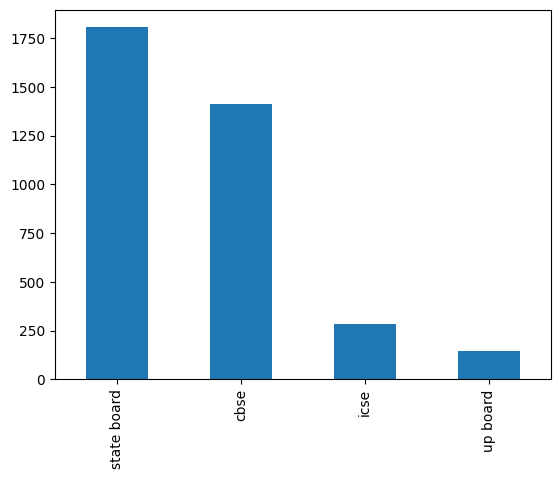

In [68]:
df['10board'].value_counts().drop('no board mentioned').plot(kind = 'bar')
plt.show()

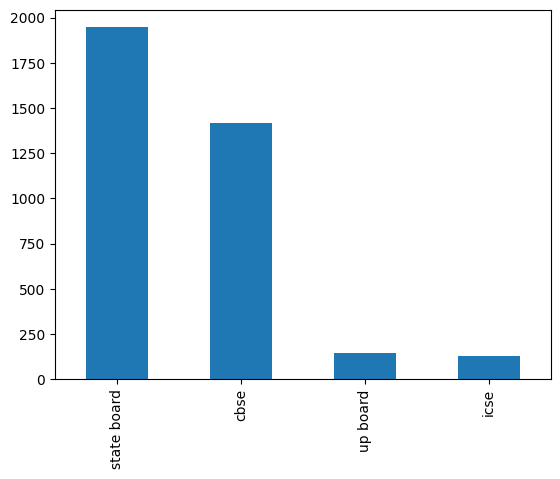

In [69]:
df['12board'].value_counts().drop('no board mentioned').plot(kind = 'bar')
plt.show()

In [70]:
gender_count = df['Gender'].value_counts()

In [71]:
gender_count.index = ['Male', 'Female']

In [72]:
gender_count

Male      3041
Female     957
Name: Gender, dtype: int64

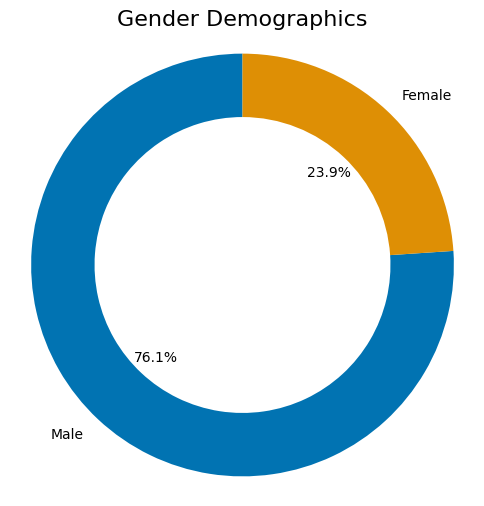

In [73]:
plt.figure(figsize=(6, 6))
plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'), wedgeprops=dict(width=0.3))
plt.axis('equal')
plt.title('Gender Demographics', fontsize=16)
plt.show()

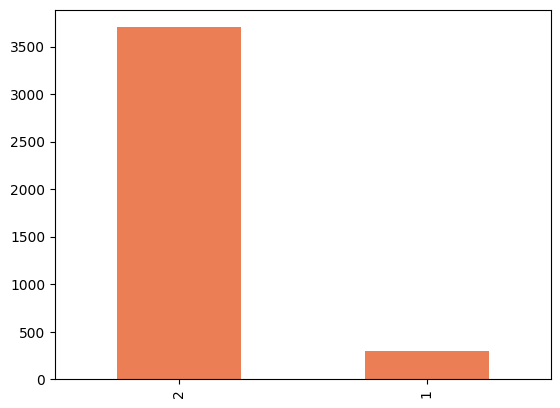

In [74]:
df['CollegeTier'].value_counts().plot(kind = 'bar', color = '#eb7e54')
plt.show()

In [75]:
degree_count = df['Degree'].value_counts().reset_index()

In [76]:
degree_count

,index,Degree
0,B.Tech/B.E.,3700
1,MCA,243
2,M.Tech./M.E.,53
3,M.Sc. (Tech.),2


In [77]:
degree_count.rename(columns={'index': 'Degree', 'Degree': 'Count'}, inplace=True)

In [78]:
degree_count.head(10)

,Degree,Count
0,B.Tech/B.E.,3700
1,MCA,243
2,M.Tech./M.E.,53
3,M.Sc. (Tech.),2


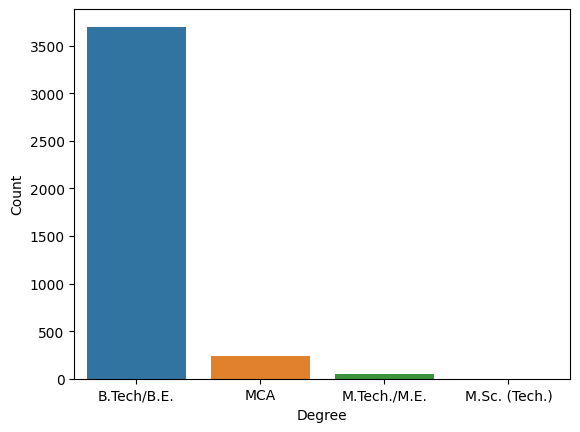

In [79]:
sns.barplot(data = degree_count, x = degree_count['Degree'], y = degree_count['Count'], hue = degree_count['Degree'])
plt.show()

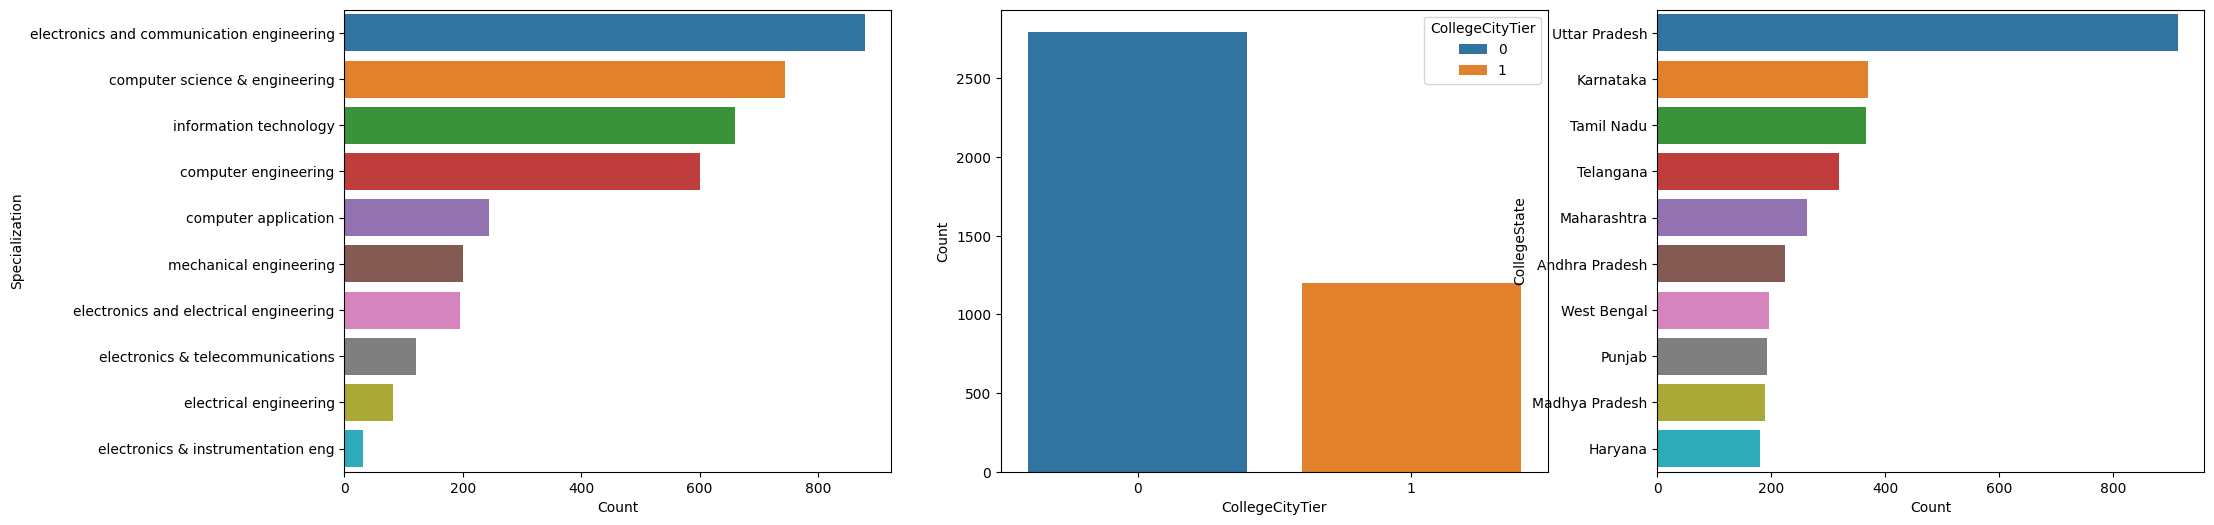

In [80]:
col = ['Specialization', 'CollegeCityTier', 'CollegeState']
fig, ax = plt.subplots(1, 3, figsize = (24, 6))
j = 0
for i in col:
  temp_df = df[i].value_counts().reset_index().head(10)
  temp_df.rename(columns={'index': i, i: 'Count'}, inplace=True)

  if i == 'CollegeCityTier':
    sns.barplot(data = temp_df, x = temp_df[i], y = temp_df['Count'], hue = temp_df[i], ax = ax[j])

  else:
    sns.barplot(data = temp_df, x = temp_df['Count'], y = temp_df[i], hue = temp_df[i], ax = ax[j], orient="h")



  j = j+1


plt.show()

## **Conclusion of the univariate analysis on Categorical Columns:**
1. Most of the people persued CBSE board.
2. Most of the candidates are Male
2. Most of the people are from Electronics OR Computer Science Background
3. Most of the people persued their college from Uttar Pradesh (Maybe because, most of the Tech colleges are in Noida and Greater Noida)

## 2. Univariate analysis (Numerical Columns)
- There are so many numerical columns, doing univariate on each column with be a tidous task, its better to use loops for it.
- For ease i have a data dicitonary table, to extract the name of the numerical columns easily
- I will attach the data dictionary table with this file.
### The data dictionary table is shown below:

In [81]:
des = pd.read_excel('/content/Copy of ameo_data_description.xlsx', header = 1)
des.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,VARIABLES,TYPE,Description
0,ID,UID,A unique ID to identify a candidate
1,Salary,Continuous,Annual CTC oﬀered to the candidate (in INR)
2,DOJ,Date,Date of joining the company
3,NaN,NaN,NaN
4,DOL,Date,Date of leaving the company


In [82]:
des.dropna(inplace = True)

In [83]:
# Extracting the continuos columns

cont_df = des[des['TYPE'].str.contains('Continuous')]
cont_df.drop(10, inplace = True)
cont_df.index = range(len(cont_df))

<ipython-input-83-7591d420011b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_df.drop(10, inplace = True)


In [84]:
cont_df

,VARIABLES,TYPE,Description
0,Salary,Continuous,Annual CTC oﬀered to the candidate (in INR)
1,10percentage,Continuous,Overall marks obtained in grade 10\nexaminations
2,12percentage,Continuous,Overall marks obtained in grade 12\nexaminations
3,CollegeGPA,Continuous,Aggregate GPA at graduation
4,English,Continuous,Scores in AMCAT English section
5,Logical,Continuous,Scores in AMCAT Logical section
6,Quant,Continuous,Scores in AMCAT Quantitative section
7,Domain,Continuous/ Standardized,Scores in AMCAT’s domain module
8,ComputerProgramming,Continuous,Score in AMCAT’s Computer programming\nsection
9,ElectronicsAndSemicon,Continuous,Score in AMCAT’s Electronics & Semiconductor E...


In [85]:
# Fixing Minor spelling mistakes
cont_df['VARIABLES'] = cont_df['VARIABLES'].replace('CollegeGPA', 'collegeGPA')
cont_df['VARIABLES'] = cont_df['VARIABLES'].replace('neuroticism', 'nueroticism')

<ipython-input-85-f9f2401b5590>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_df['VARIABLES'] = cont_df['VARIABLES'].replace('CollegeGPA', 'collegeGPA')
<ipython-input-85-f9f2401b5590>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_df['VARIABLES'] = cont_df['VARIABLES'].replace('neuroticism', 'nueroticism')


In [86]:
cont_list = cont_df['VARIABLES'].values.tolist()

In [87]:
cont_list   # Now we have the continous column name list

['Salary',
 '10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [88]:
df[cont_list].describe()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,74.466366,71.486171,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,10.999933,8.167338,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,40.000000,6.450000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,66.000000,66.407500,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,74.400000,71.720000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,82.600000,76.327500,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


- Tip: Zoom in to get better look at box plots

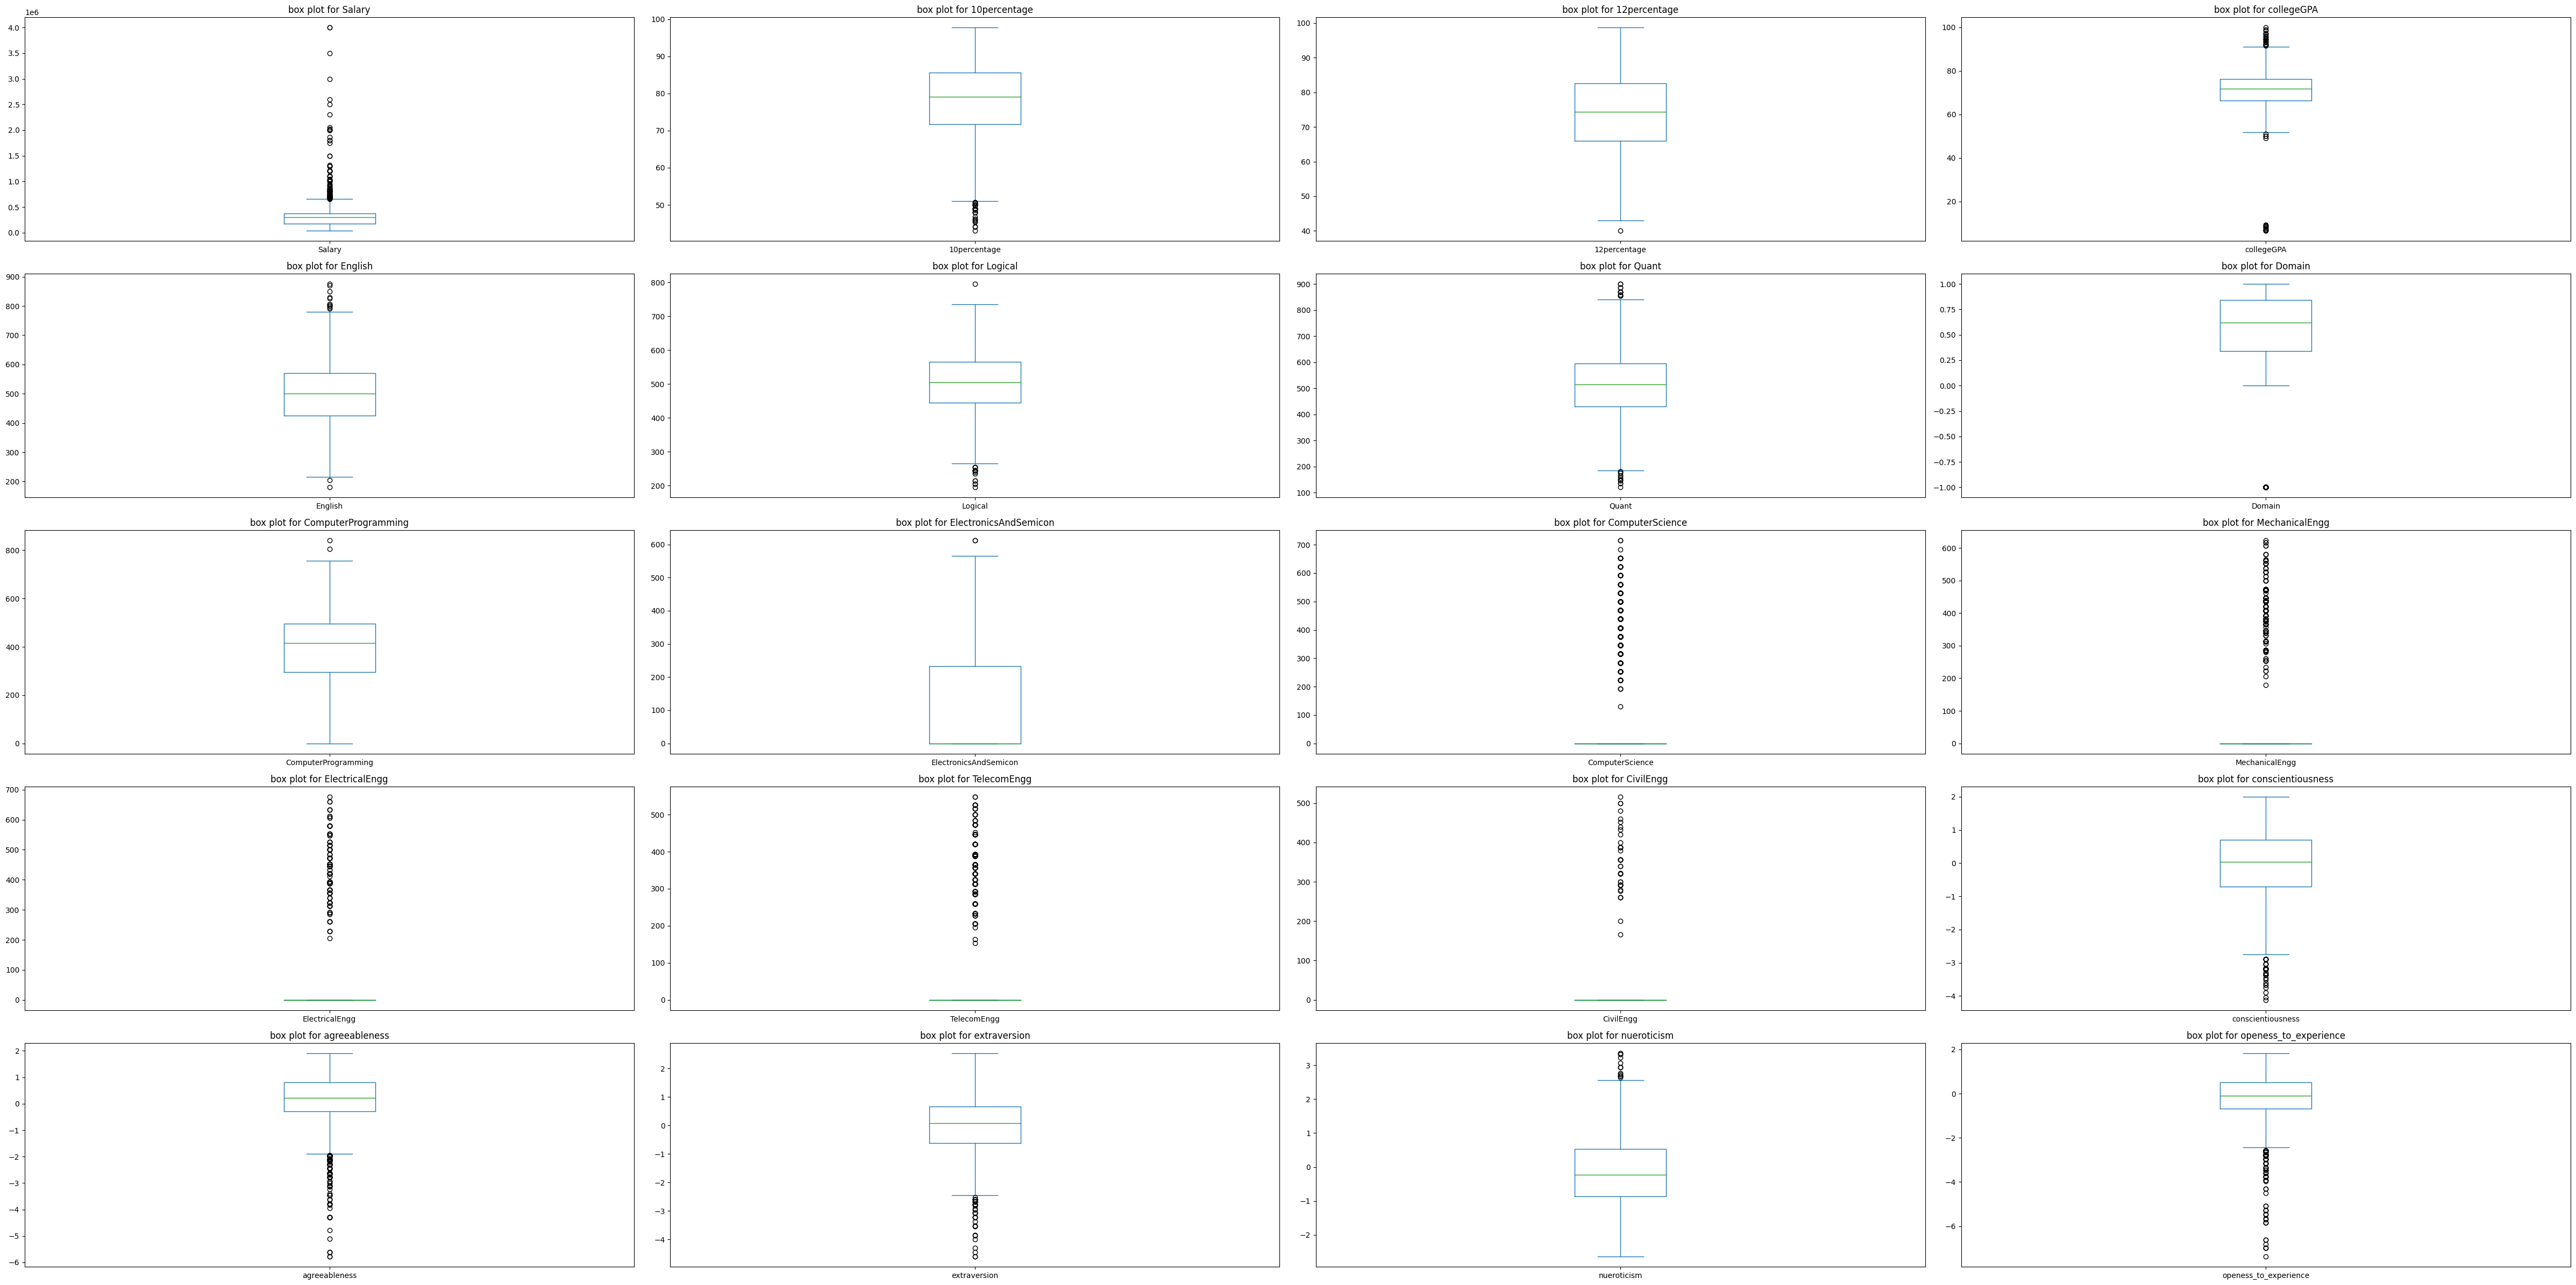

In [89]:
fig, axs = plt.subplots(5, 4, figsize=(48, 24))
r = 0
c = 0
for i in cont_list:

  df[i].plot(kind = 'box', ax = axs[r, c])
  axs[r, c].set_title(f"box plot for {i}")

  c = c+1
  if c == 4:
    r = r+1
    c = 0



plt.tight_layout()
plt.show()

### We can see there are so much outliers in the AMCAT scores.
 - The reason is they contain many -1 values
 - Lets remove them and plot again

In [90]:
amcat_cols = df.columns[-12 : -5].tolist()

In [91]:
len(amcat_cols)

7

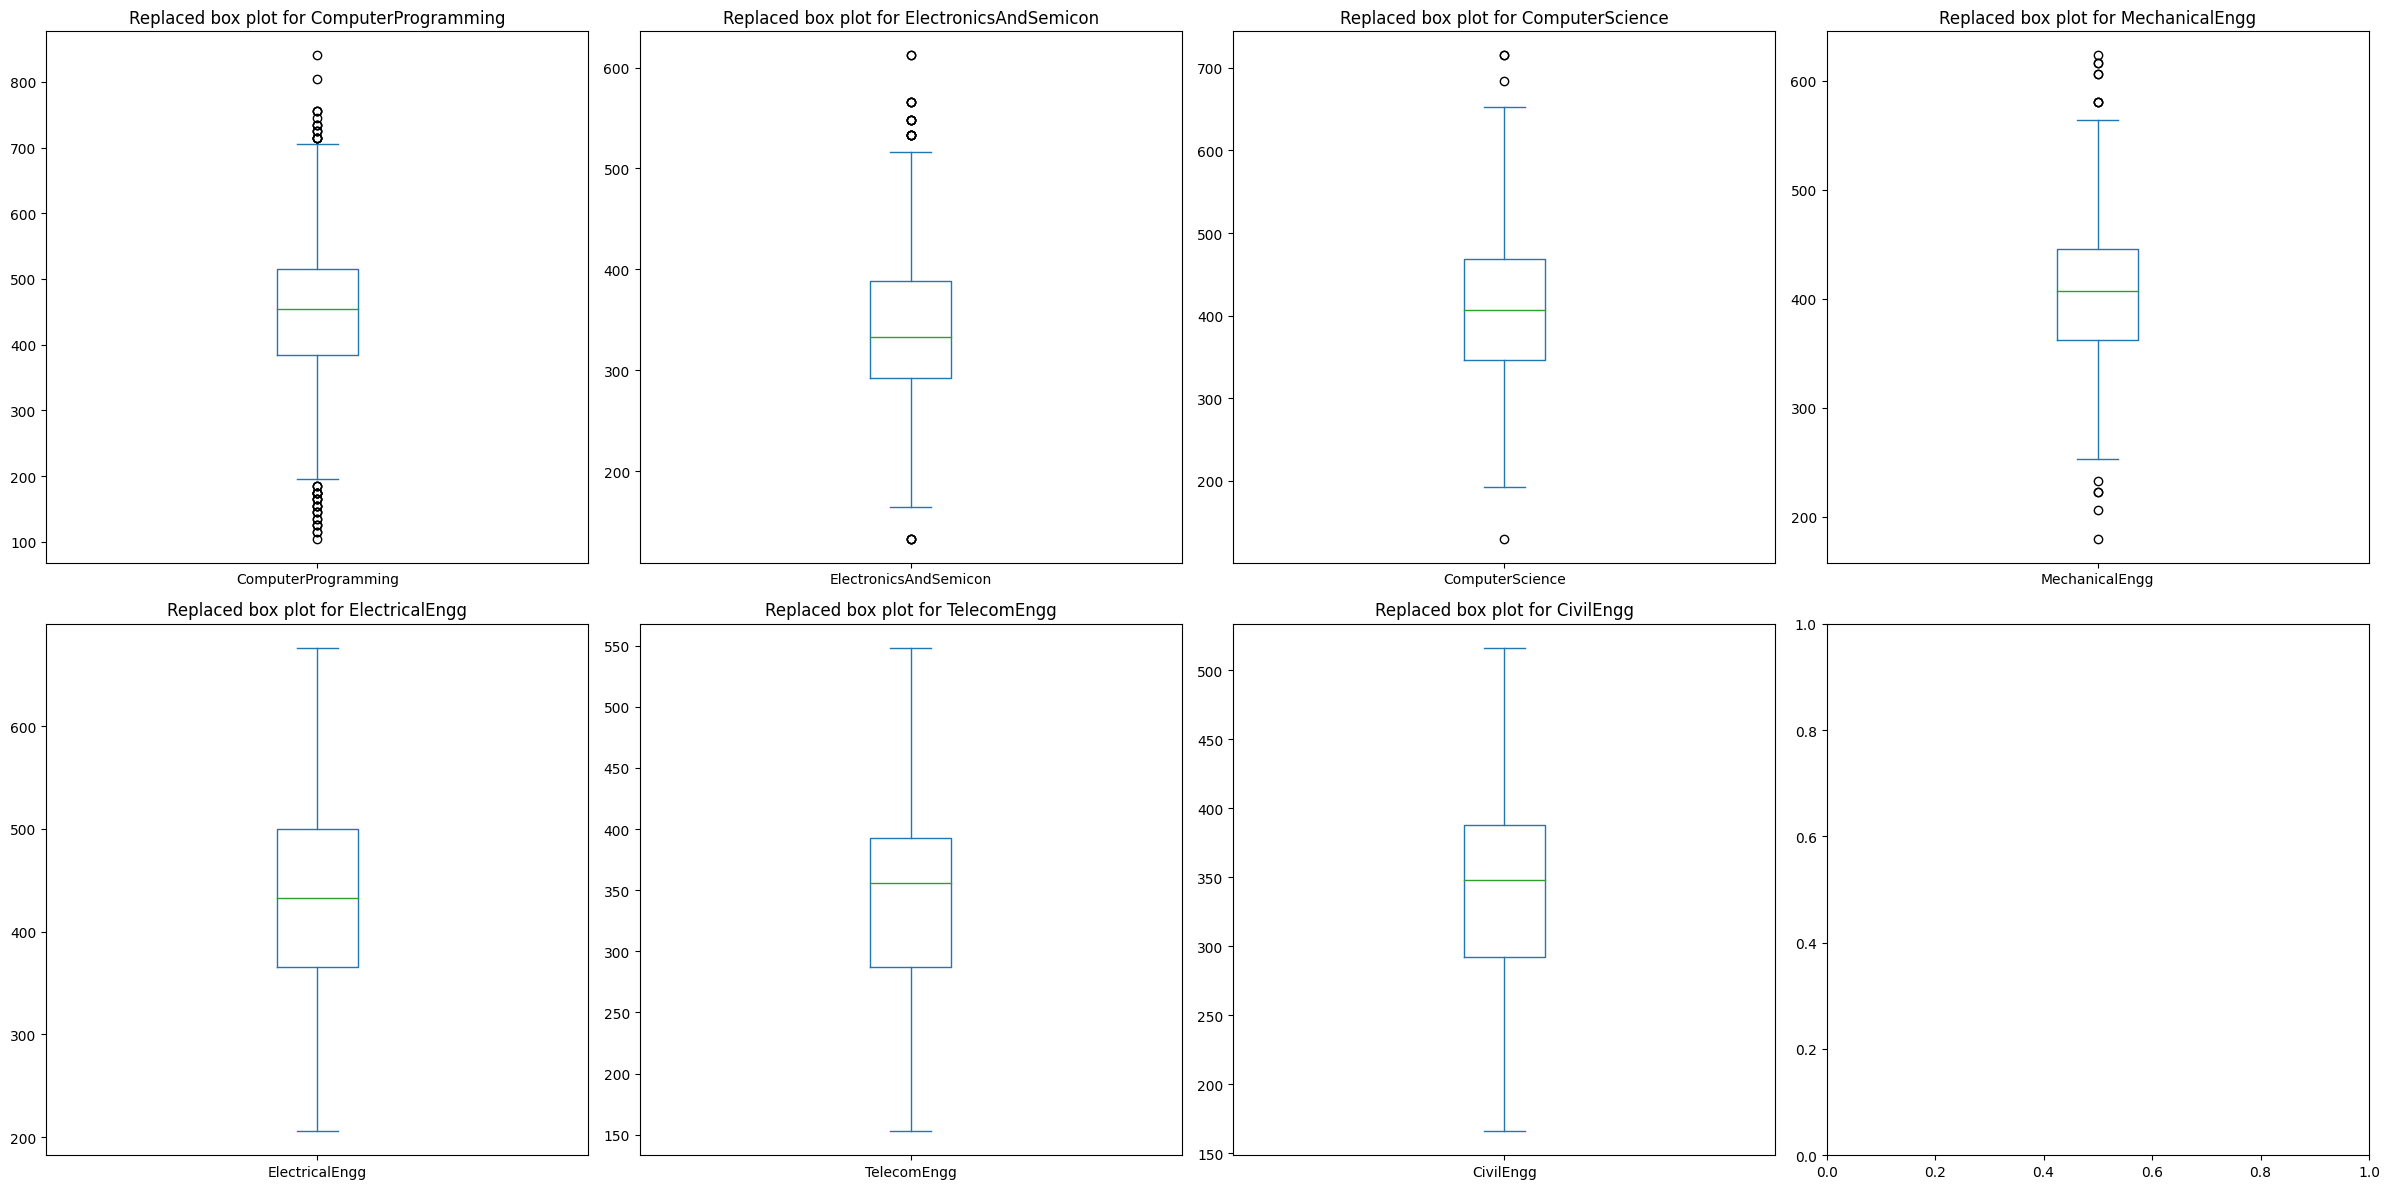

In [92]:
fig, axs = plt.subplots(2, 4, figsize=(24, 12))
r = 0
c = 0
for i in amcat_cols:

  df[i].replace(-1, np.nan).plot(kind = 'box', ax = axs[r, c])
  axs[r, c].set_title(f"Replaced box plot for {i}")

  c = c+1
  if c == 4:
    r = r+1
    c = 0



plt.tight_layout()
plt.show()

### **Conclusion of Box plot:**
1. On Replacing -1 values from AMCAT scores, it changed the overall boxplot

### Lets plot Kernal Density Estimation

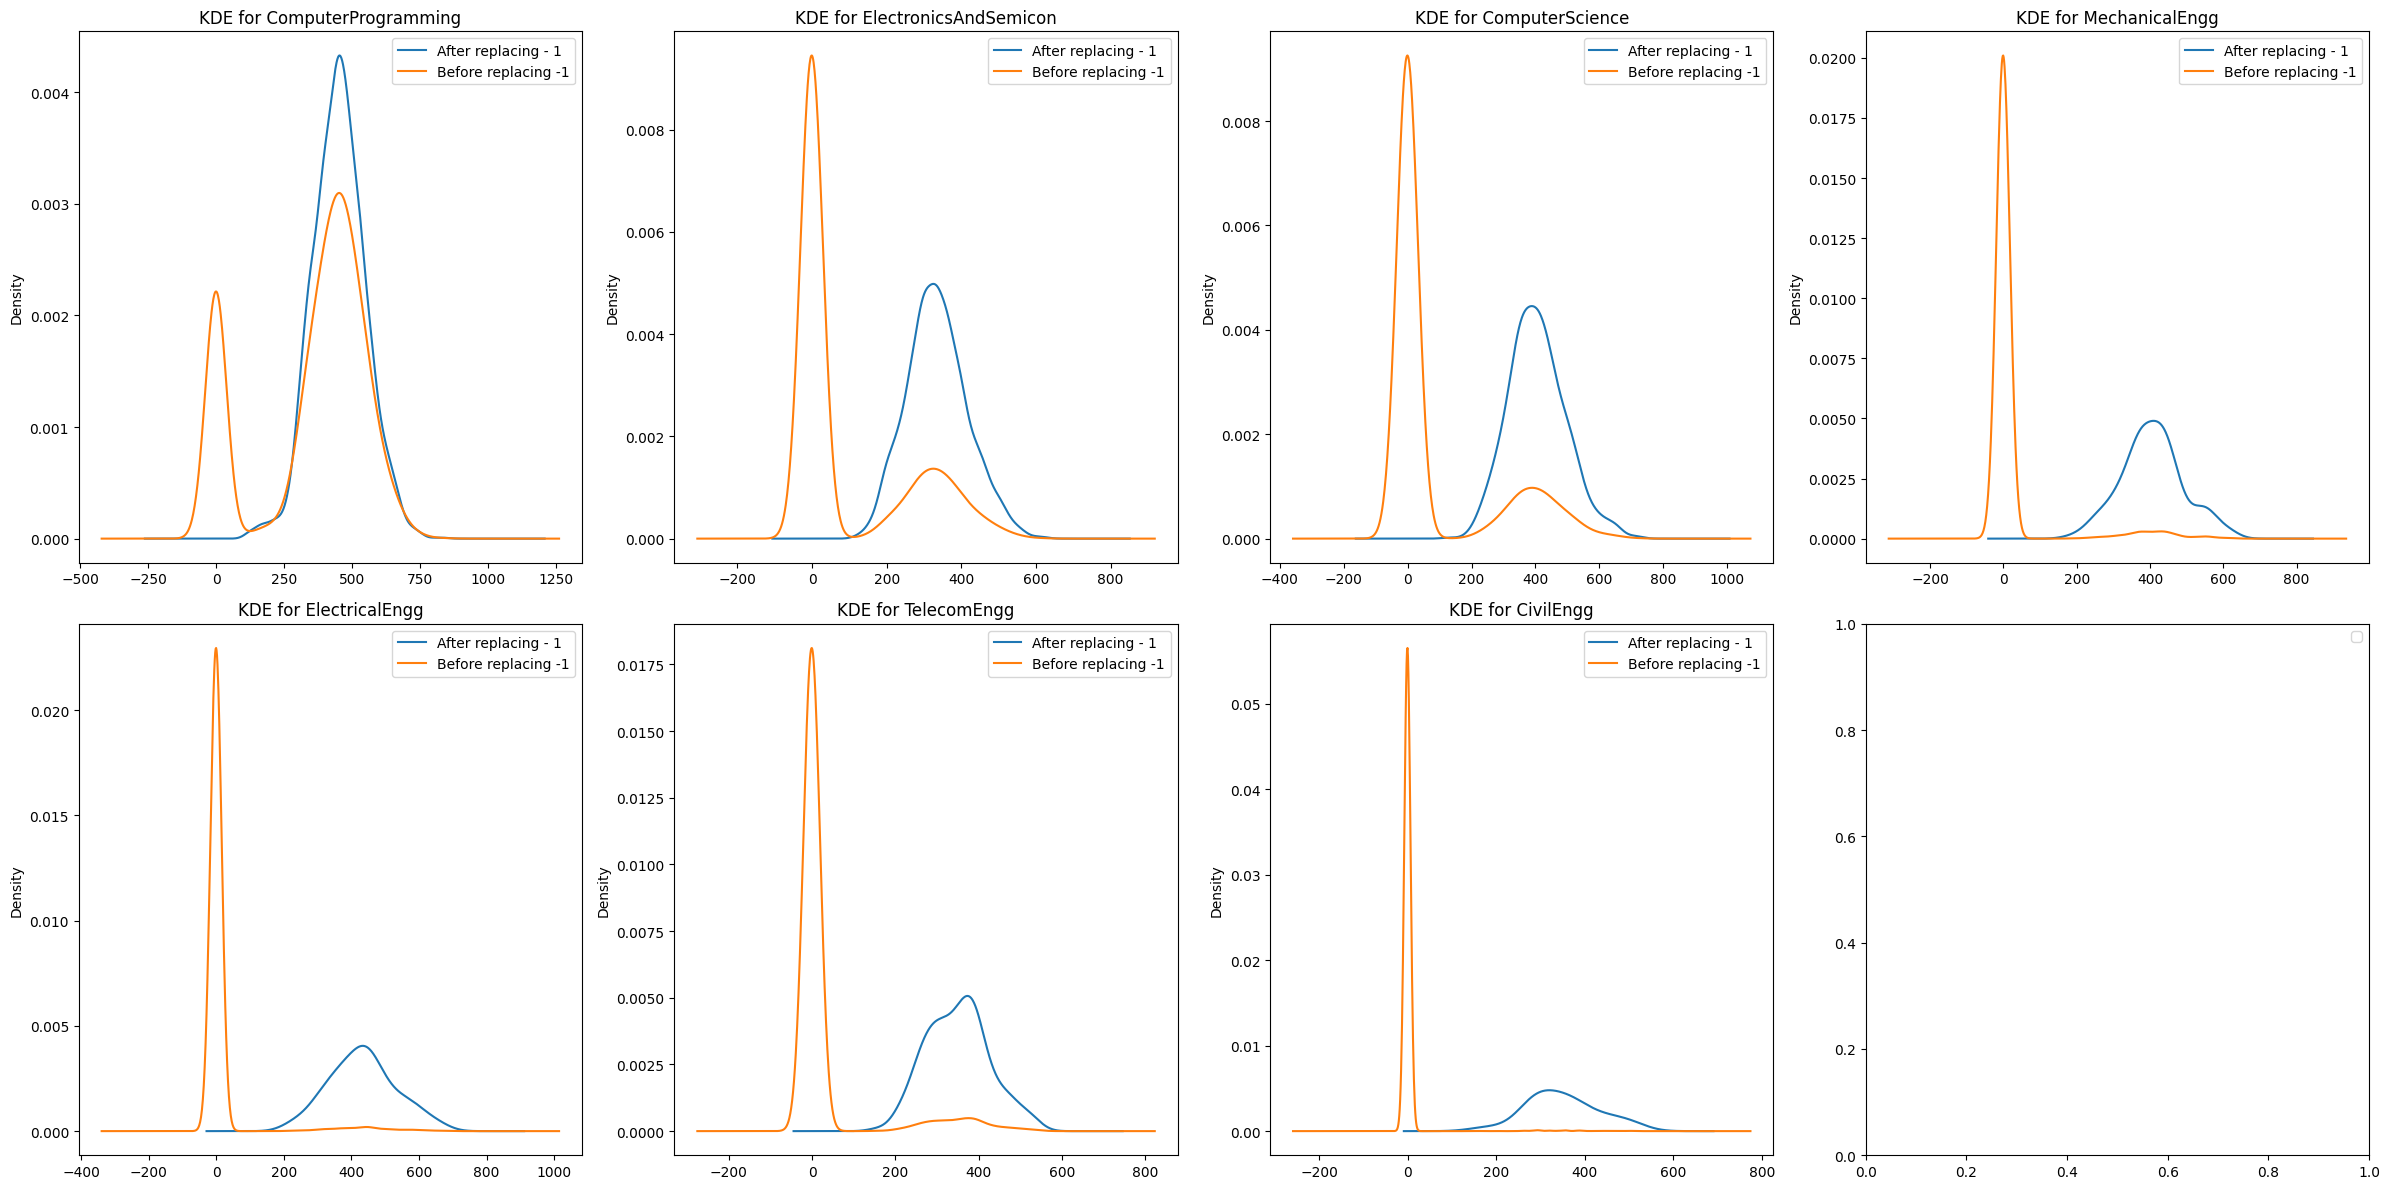

In [93]:
fig, axs = plt.subplots(2, 4, figsize=(24, 12))
r = 0
c = 0
for i in amcat_cols:

  df[i].replace(-1, np.nan).plot(kind = 'kde', ax = axs[r, c], label = 'After replacing - 1')
  df[i].plot(kind = 'kde', ax = axs[r, c], label = 'Before replacing -1')
  # df['ComputerScience'].replace(-1, np.nan).plot(kind = 'kde', ax = axs[r, c])
  # df['ComputerScience'].plot(kind = 'kde', ax = axs[r, c])
  axs[r, c].set_title(f"KDE for {i}")

  c = c+1
  if c == 4:
    r = r+1
    c = 0

for ax in axs.flat:
    ax.legend()


plt.tight_layout()
# plt.legend()
plt.show()

 - **Blue Curve**: After replacing -1
 - **Orange Curve**: Before replacing - 1

 ## **Conclusion of KDE plot:**
  - The Distribution changes when removing -1.
  - Not only the distribution changes, it changes into normal distribution.
  - As -1 Represents not attempted section, according to this, CivilEngg is the most unattempted section.
  - Most attempted section is Computer Programming.

In [94]:
cont_list

['Salary',
 '10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [95]:
amcat_cols

['ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg']

In [96]:
remaining_cols = []
for i in cont_list:
  if i not in amcat_cols:
    remaining_cols.append(i)

In [97]:
len(remaining_cols)

13

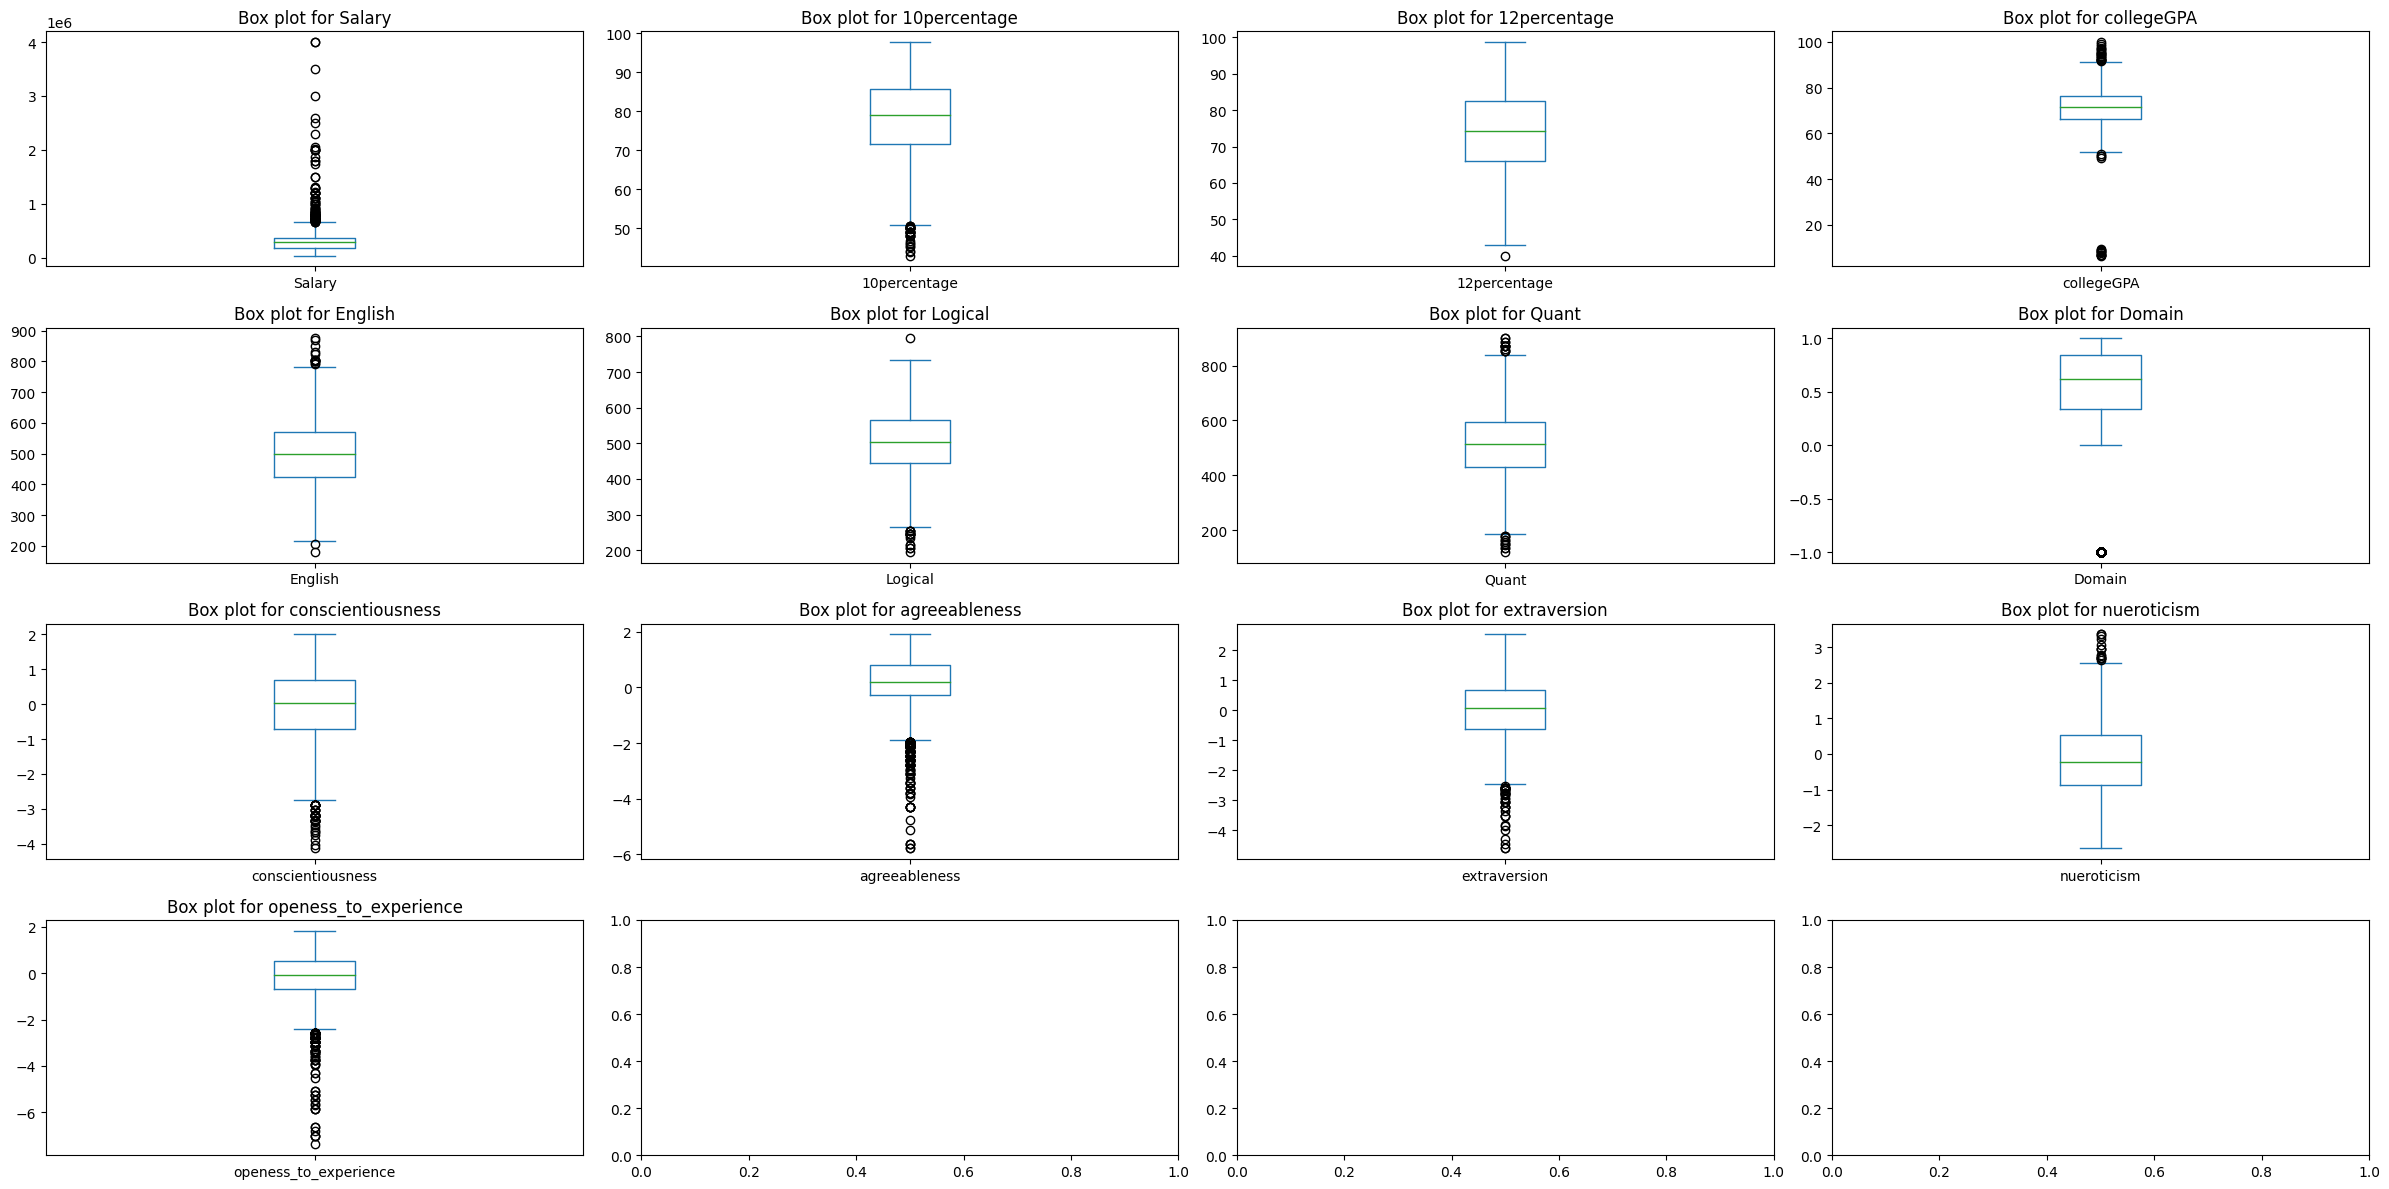

In [98]:
fig, axs = plt.subplots(4, 4, figsize=(24, 12))
r = 0
c = 0
for i in remaining_cols:

  df[i].plot(kind = 'box', ax = axs[r, c])
  axs[r, c].set_title(f"Box plot for {i}")

  c = c+1
  if c == 4:
    r = r+1
    c = 0



plt.tight_layout()
plt.show()

## As we can see there are lots of outliers in each column

In [99]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [100]:
df['Salary'].describe()

count      3998.000
mean     307699.850
std      212737.500
min       35000.000
25%      180000.000
50%      300000.000
75%      370000.000
max     4000000.000
Name: Salary, dtype: float64

In [101]:
df[df['Salary'] == 4000000]

,ID,Salary,DOJ,DOL,Designation,JobCity,Age,Gender,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1237,48107,4000000,2010-07-01,2015-03-01 00:00:00,senior software engineer,Delhi,28,m,90.830,state board,...,-1,-1,-1,-1,-1,-0.726,0.033,-1.650,-0.878,-0.130
2182,41147,4000000,2010-01-01,2011-12-01 00:00:00,automation engineer,Chennai,28,m,53.000,up board,...,-1,-1,-1,-1,-1,-3.354,-0.435,-1.070,-0.055,-2.657


- Even tho Salary columns has outliers, they are valid.
- They should only be removed for a particular process, like machine learning.

<Axes: >

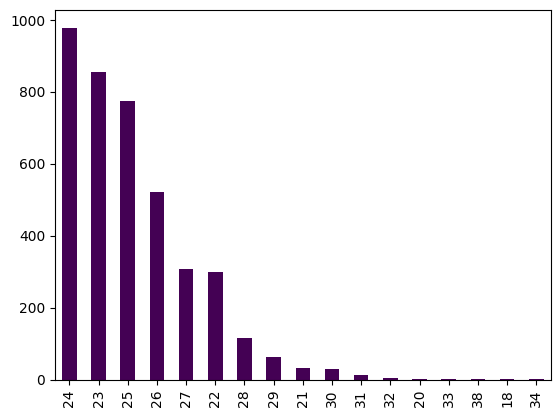

In [102]:
df['Age'].value_counts().plot(kind = 'bar', colormap = 'viridis')

### Conclusion of Univarite Analysis on Numerical Columns:
1. The AMCAT scores contains many -1 values, when removing them:
  - The box plot shows less outlier.
  - The whole kde plot changes to Normal Distribution.
  
2. The Salary and other column contains outliers, but they seem valid. Currently we will not remove, them we will remove them according to the later process.

# Bivariate Analysis - Analysis On two columns simultaneously
1. **Numerical vs Numerical**

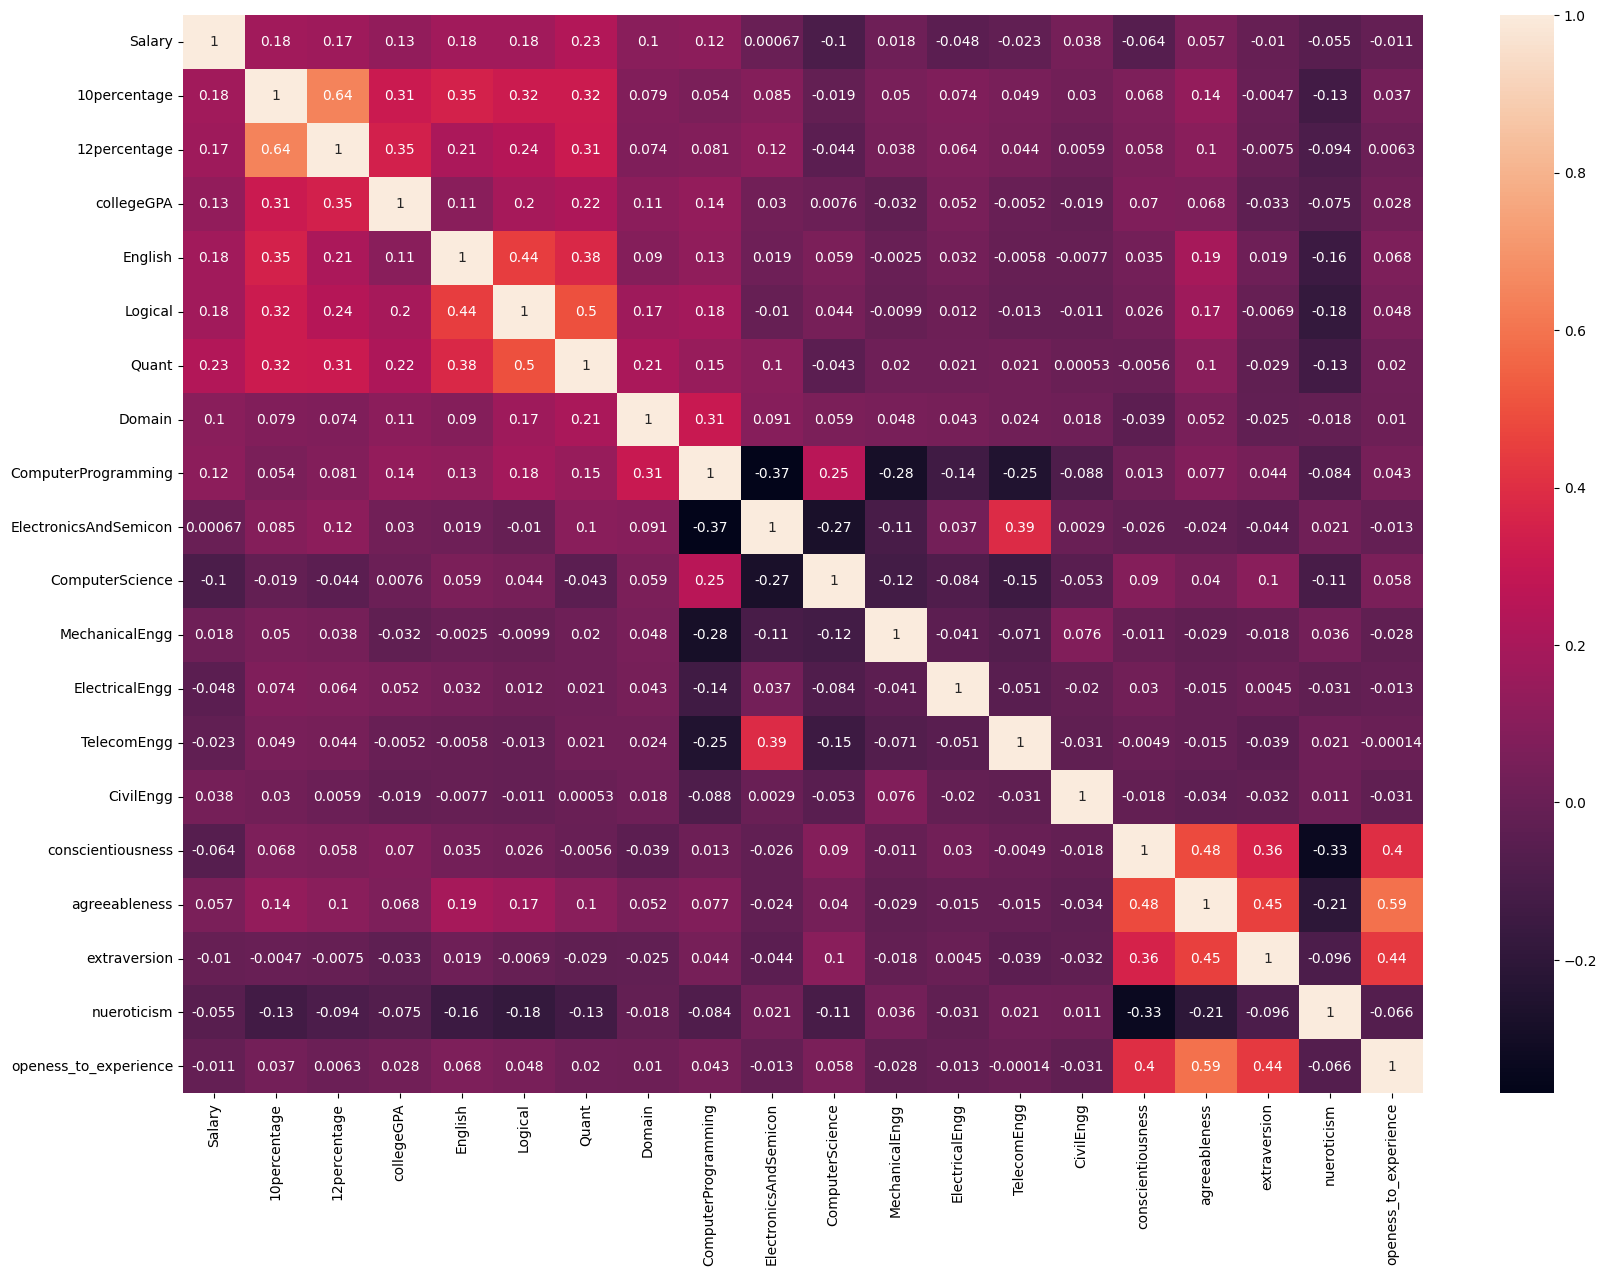

In [103]:
plt.figure(figsize=(20, 14))
sns.heatmap(df[cont_list].corr(), annot = True)
plt.show()

In [104]:
num_df = df[cont_list]

In [105]:
to_replace = num_df.columns[-13:-5]

### Lets remove -1 values then we will again plot the Correlation heatmap

In [106]:
for i in to_replace:
  num_df[i].replace(-1, np.nan, inplace = True)

<ipython-input-106-f363046aba0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[i].replace(-1, np.nan, inplace = True)


In [107]:
for i in to_replace:
  print(f"{i}:", (num_df[i] == -1).sum())

Domain: 0
ComputerProgramming: 0
ElectronicsAndSemicon: 0
ComputerScience: 0
MechanicalEngg: 0
ElectricalEngg: 0
TelecomEngg: 0
CivilEngg: 0


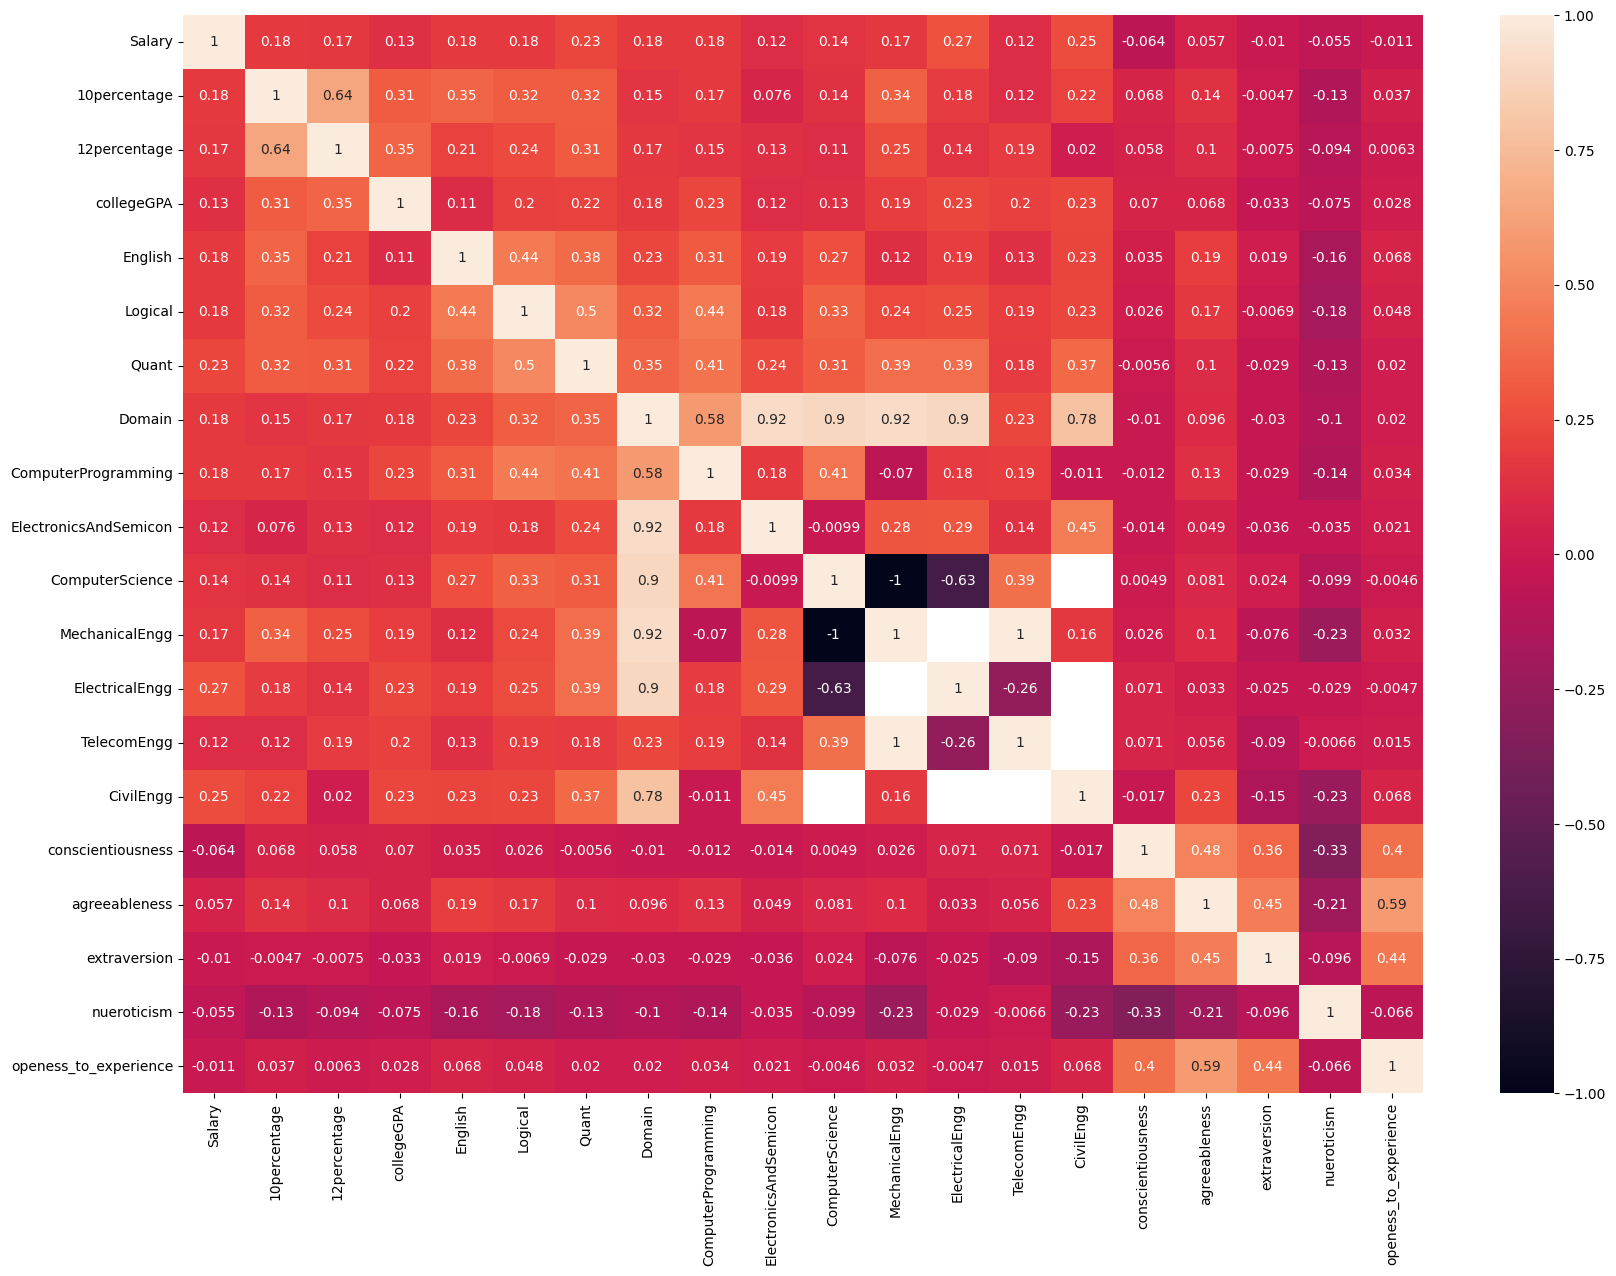

In [108]:
plt.figure(figsize=(20, 14))
sns.heatmap(num_df.corr(), annot = True)
plt.show()

## We have a major improvement in the heatmap, the correlation became positive
- There is a very strong multicollinearity between **Domain** and other AMCAT score columns.

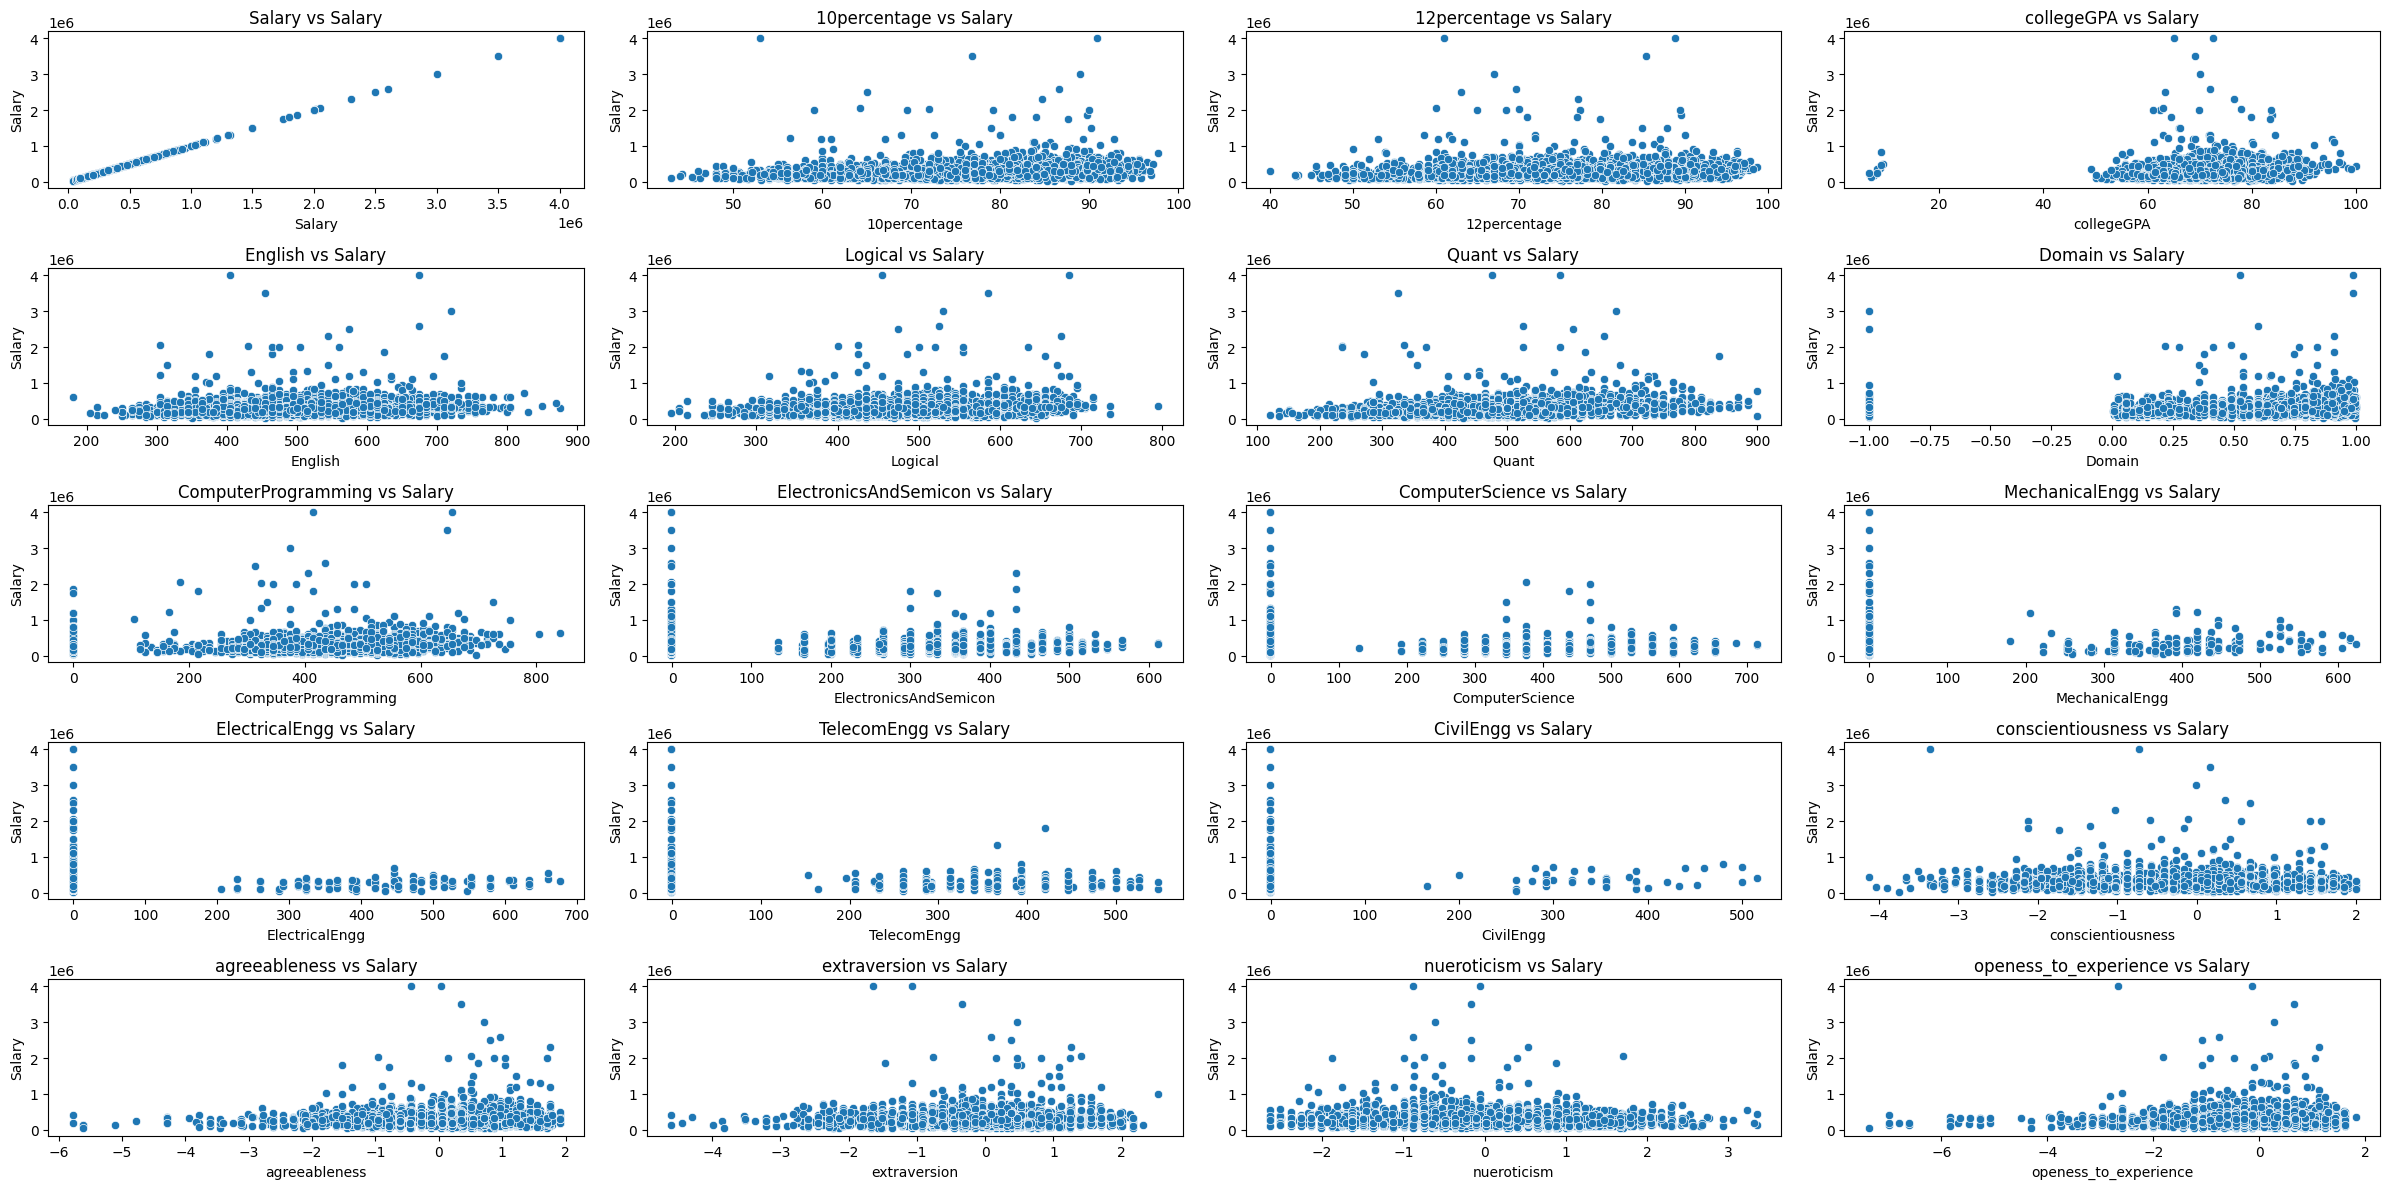

In [109]:
fig, axs = plt.subplots(5, 4, figsize=(24, 12))
r = 0
c = 0
for i in cont_list:

  sns.scatterplot(data = df[cont_list], x = df[cont_list][i], y = df[cont_list]['Salary'], ax = axs[r, c])
  axs[r, c].set_title(f"{i} vs Salary")

  c = c+1
  if c == 4:
    r = r+1
    c = 0



plt.tight_layout()
plt.show()

In [110]:
temp_list = cont_list[-13:-5]

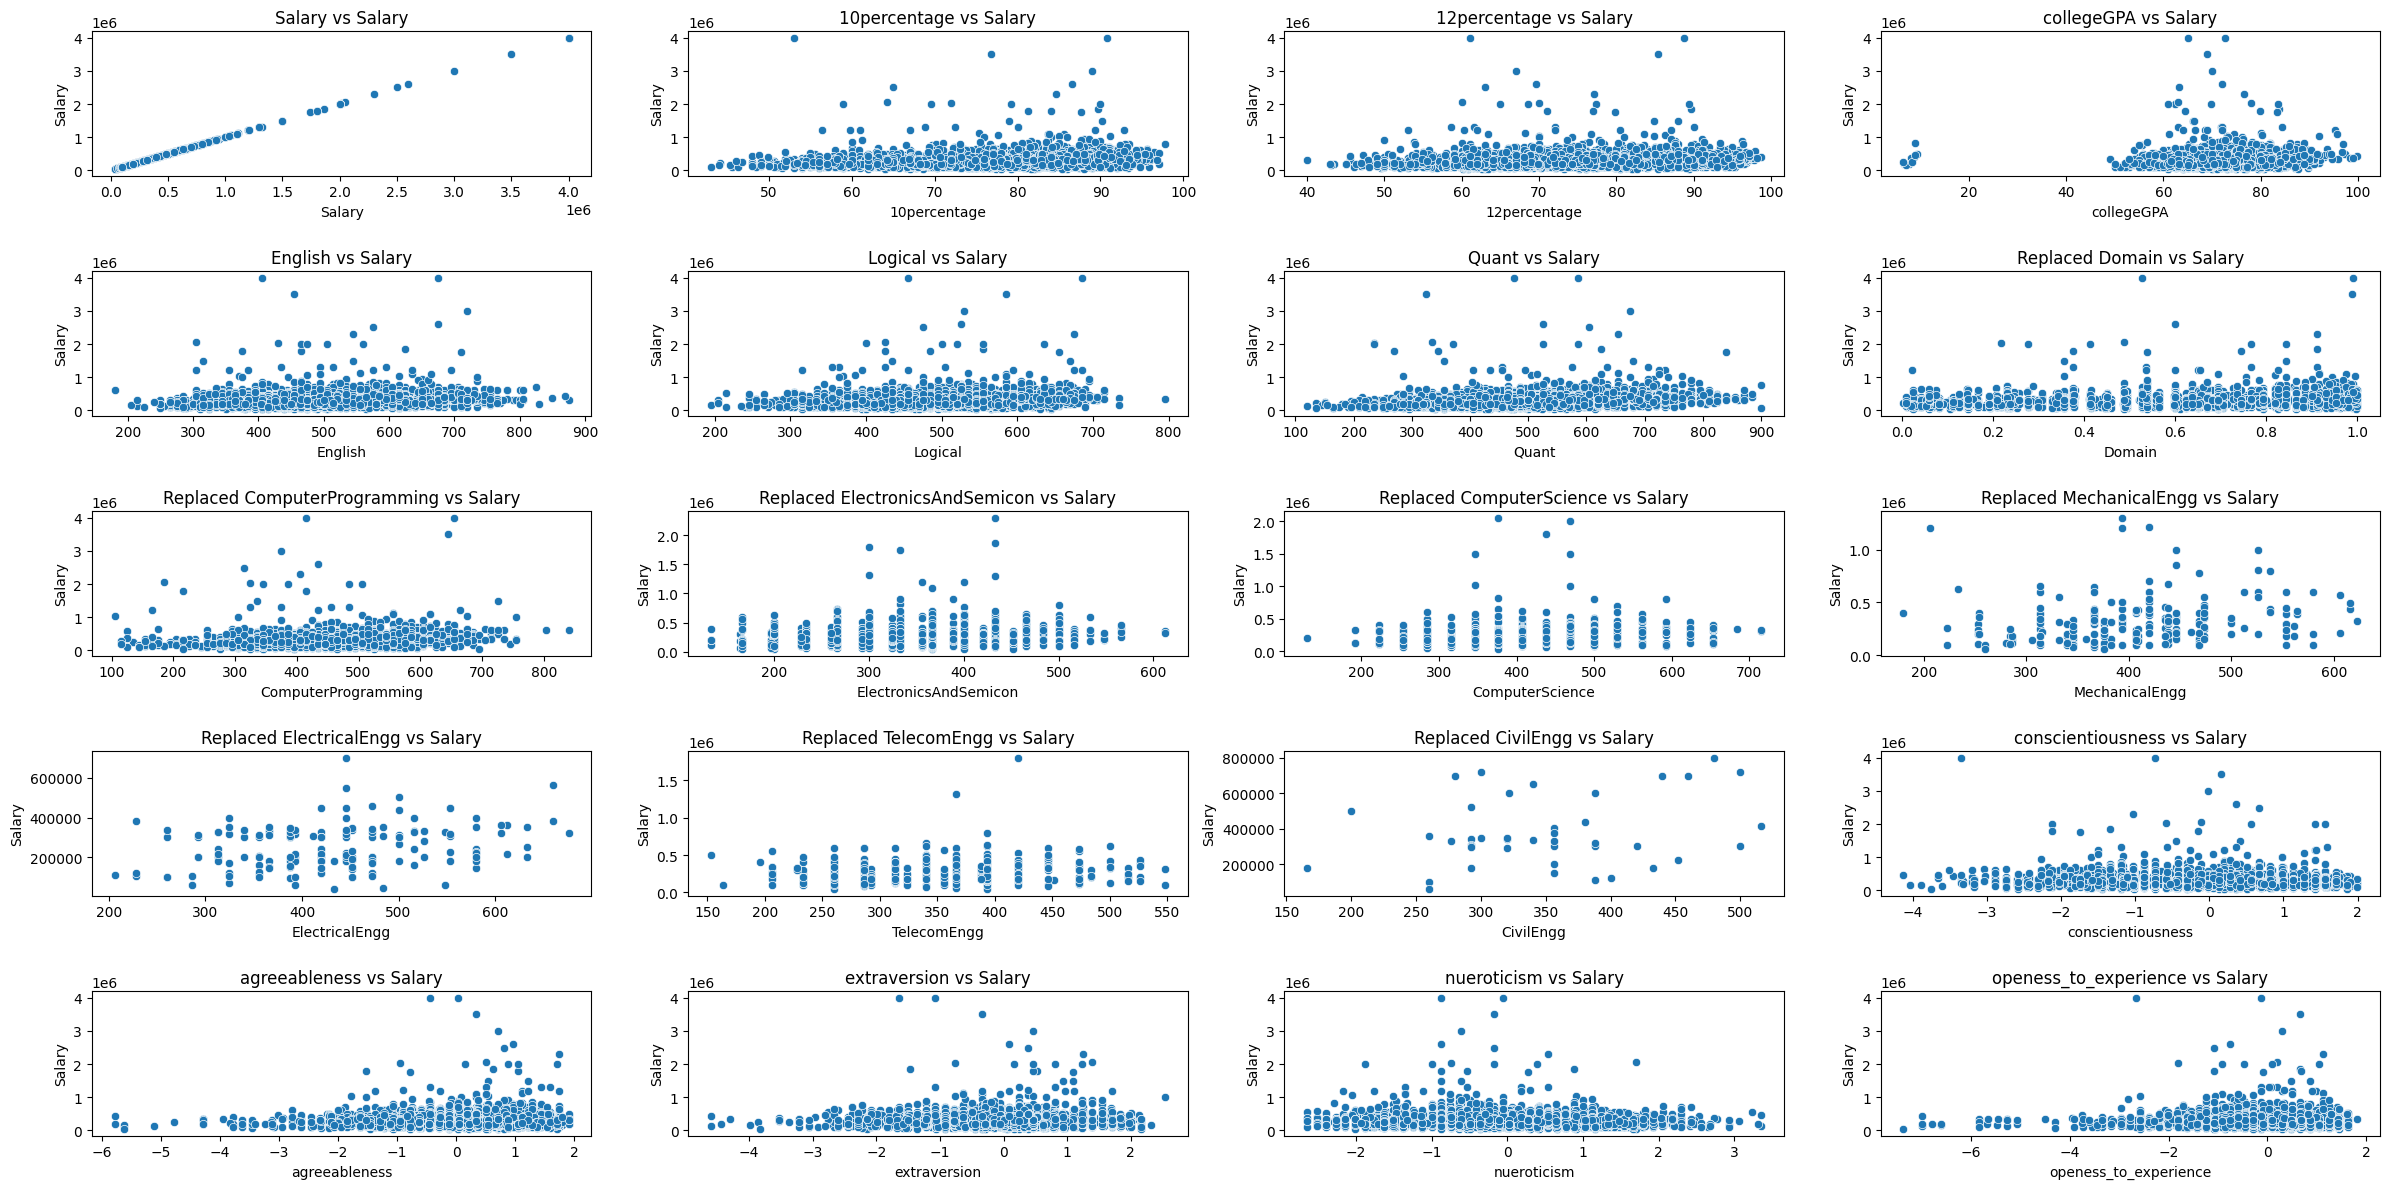

In [111]:
fig, axs = plt.subplots(5, 4, figsize=(24, 12))
r = 0
c = 0
for i in cont_list:
  if i in temp_list:
    sns.scatterplot(data = num_df, x = num_df[i], y = num_df['Salary'], ax = axs[r, c])
    axs[r, c].set_title(f"Replaced {i} vs Salary")

  else:
    sns.scatterplot(data = df[cont_list], x = df[cont_list][i], y = df[cont_list]['Salary'], ax = axs[r, c])
    axs[r, c].set_title(f"{i} vs Salary")

  c = c+1
  if c == 4:
    r = r+1
    c = 0



plt.tight_layout()
plt.show()

### There is a very slight Improvement in the scatter plots, but not much

### 2. Categorical vs Numerical

In [112]:
df['10board'].value_counts()

state board           1806
cbse                  1414
no board mentioned     350
icse                   284
up board               144
Name: 10board, dtype: int64

<Axes: xlabel='10board'>

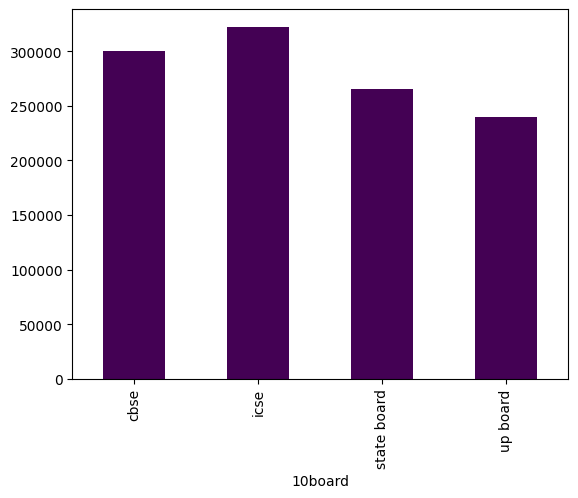

In [113]:
df.groupby('10board')['Salary'].median().drop('no board mentioned').plot(kind = 'bar', colormap = 'viridis')

<Axes: xlabel='Age'>

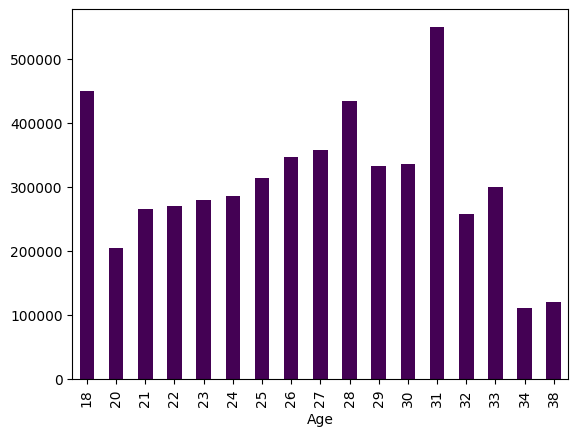

In [114]:
df.groupby('Age')['Salary'].mean().plot(kind = 'bar', colormap = 'viridis')

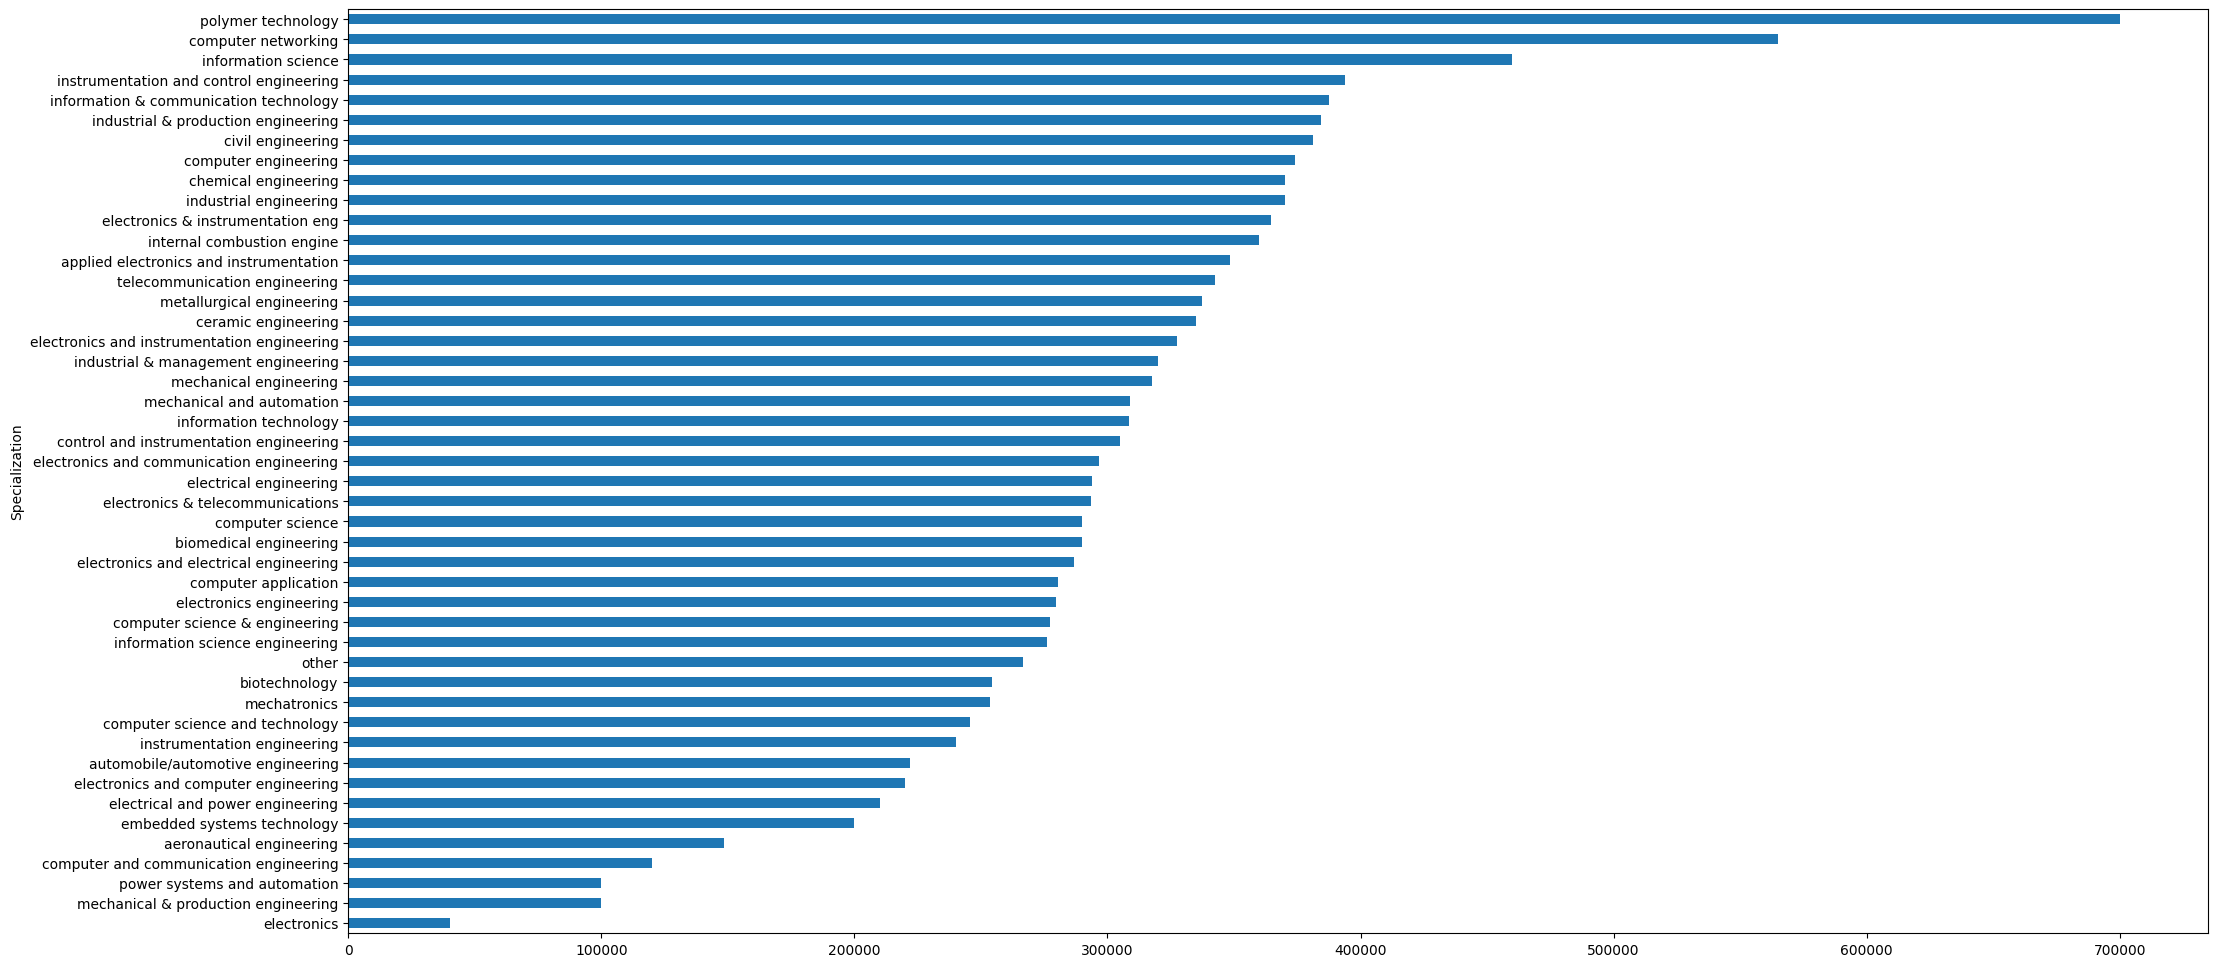

In [115]:
plt.figure(figsize = (24, 12))
df.groupby('Specialization')['Salary'].mean().sort_values().plot.barh()
plt.show()

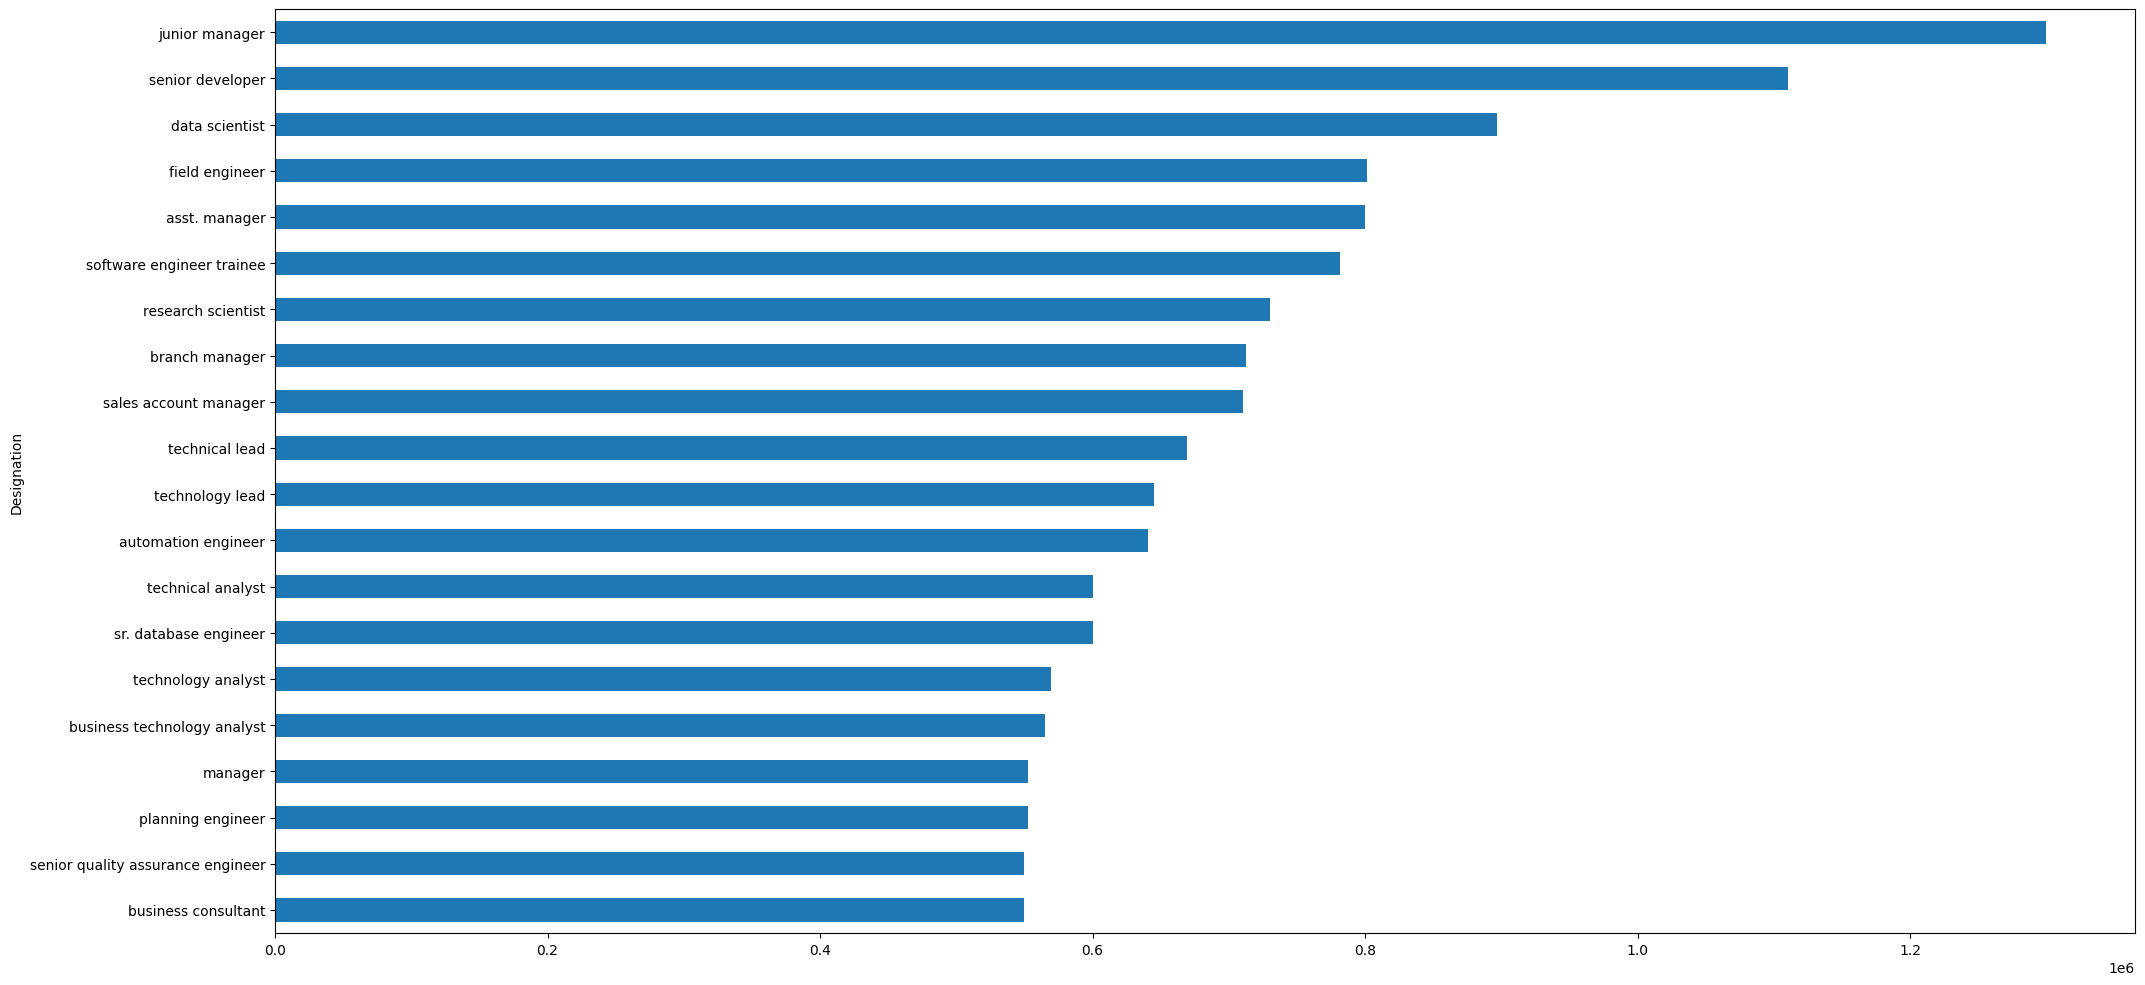

In [116]:
plt.figure(figsize = (24, 12))
df.groupby('Designation')['Salary'].mean().sort_values().tail(20).plot.barh()
plt.show()

<Axes: xlabel='Degree'>

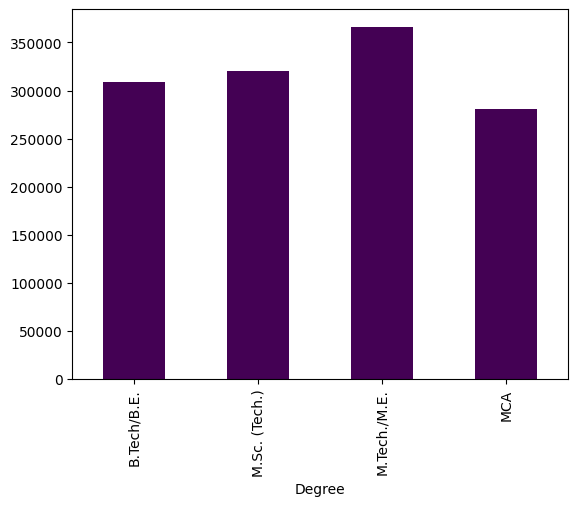

In [123]:
df.groupby(df['Degree'])['Salary'].mean().plot(kind = 'bar', colormap=  'viridis')

## Question1: Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)
We will test it using chi-square test.

In [131]:
contin_df = pd.crosstab(df['Gender'], df['Specialization'])

In [132]:
chi2, p, dof, expected = chi2_contingency(contin_df)

In [133]:
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 104.46891913608455
p-value: 1.2453868176976918e-06
Degrees of freedom: 45
Expected frequencies table:
[[7.18109055e-01 2.15432716e+00 1.19684842e+00 4.78739370e-01
  3.59054527e+00 2.39369685e-01 2.15432716e+00 6.94172086e+00
  2.39369685e-01 5.84062031e+01 1.43621811e+02 2.39369685e-01
  4.78739370e-01 1.78091046e+02 1.43621811e+00 2.39369685e-01
  4.78739370e-01 1.96283142e+01 2.39369685e-01 7.65982991e+00
  2.89637319e+01 2.10645323e+02 7.18109055e-01 4.69164582e+01
  6.46298149e+00 4.54802401e+00 2.39369685e-01 2.39369685e-01
  2.39369685e+00 4.78739370e-01 4.78739370e-01 2.39369685e-01
  6.46298149e+00 1.57983992e+02 4.78739370e+00 9.57478739e-01
  2.39369685e-01 2.39369685e-01 1.19684842e+00 4.81133067e+01
  9.57478739e-01 4.78739370e-01 3.11180590e+00 2.39369685e-01
  2.39369685e-01 1.43621811e+00]
 [2.28189095e+00 6.84567284e+00 3.80315158e+00 1.52126063e+00
  1.14094547e+01 7.60630315e-01 6.84567284e+00 2.20582791e+01
  7.60630315e-01 1.85593797e+02 4.563

- The p value is very small than the significance level 0.05
- We **can't Reject** the  null hypothesis which is - Specialization depends on gender.

### **Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”**
#### Lets test this claim using one-sample t-test

In [181]:
df[df['Designation'].str.contains('associate engineer')]['Designation'].value_counts()

associate engineer    6
Name: Designation, dtype: int64

In [166]:
claim_df = df[(df["Specialization"] == "computer science & engineering") &
            (df["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"]))]

In [167]:
claim_df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Age,Gender,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
6,947847,300000,2014-08-01,2015-05-01 00:00:00,software engineer,Bangalore,22,m,86.080,state board,...,346,-1,-1,-1,-1,1.708,-0.105,-1.038,-2.009,-1.087
24,963123,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,22,m,88.000,state board,...,346,-1,-1,-1,-1,0.415,0.803,0.136,-0.995,-0.669
31,1094324,340000,2014-08-01,2015-04-01 00:00:00,software engineer,Bangalore,23,m,77.200,state board,...,407,-1,-1,-1,-1,-0.015,1.211,1.086,-1.502,0.289
46,592833,205000,2013-07-01,2015-04-01 00:00:00,software engineer,Noida,24,f,85.600,cbse,...,253,-1,-1,-1,-1,0.128,0.545,0.164,-0.488,0.864
48,338428,390000,2013-09-01,present,software engineer,Bangalore,24,m,86.600,cbse,...,346,-1,-1,-1,-1,-2.504,0.033,0.382,0.268,0.502


In [173]:
mean_salary = claim_df["Salary"].mean()
std_salary = claim_df["Salary"].std()

In [174]:
print(f"The mean salary of the relevant group of graduates is {mean_salary:.1f} with a standard deviation of {std_salary:.1f}")

The mean salary of the relevant group of graduates is 327337.7 with a standard deviation of 166276.2


In [180]:
t_stat, p_value = stats.ttest_1samp(a=claim_df["Salary"], popmean=250000)

In [176]:
print(f"The one-sample t-test gives a test statistic of {t_stat:.1f} with {len(data)-1} degrees of freedom and a p-value of {p_value:.3f}")

The one-sample t-test gives a test statistic of 7.1 with 3997 degrees of freedom and a p-value of 0.000


In [177]:
alpha = 0.05
if p_value <= alpha:
    print(f"Since the p-value is less than the significance level of {alpha}, we reject the null hypothesis and conclude that the claim made by the Times of India article is false.")
else:
    print(f"Since the p-value is greater than the significance level of {alpha}, we cannot reject the null hypothesis and conclude that the claim made by the Times of India article is not proven to be false.")

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that the claim made by the Times of India article is false.


### According to the t-test, this claim came out to be false